In [216]:
%load_ext autoreload
%autoreload 1
%aimport RedditProcessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from redditClient import redditClient
# import praw
# from praw.models import MoreComments
from collections import Counter
import string
import json
import codecs
import re
import time
import sys
import datetime

# from redditscore.tokenizer import CrazyTokenizer

import nltk
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')

from colorama import Fore, Back, Style
from tabulate import tabulate
import datetime as dt

c:\Users\rakya\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rakya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
data_colnames = ["title", "type", "comments", "votes", "date", "time"]
playerNames = ['f0rsaken', 'jinggg', 'd4v41', 'mindfreak', 'something', 'benkai']
colorList = ['gold', 'hotpink', 'green', 'lightblue', 'red', 'blue']
dataThreadLst_raw = []

for i in range(len(playerNames)):
    filename_head = "data_"
    filename_tail = "_rep_view_final.csv"
    filename_final = filename_head+playerNames[i].lower()+filename_tail
    dataThreadLst_raw.append(pd.read_csv(filename_final, names=data_colnames))
    
for i in range(len(playerNames)):
    print("Length of data for " + playerNames[i] + ": " + str(len(dataThreadLst_raw[i])))
    
regexpr = r'\w+' # Regular Expression for tokenizer
num_freq_term = 25

Length of data for f0rsaken: 917
Length of data for jinggg: 927
Length of data for d4v41: 943
Length of data for mindfreak: 905
Length of data for something: 926
Length of data for benkai: 918


In [172]:
data_colnames = ["title", "type", "comment", "country", "vote", "commDate", "commTime", "threadDate", "threadTime"]
playerNames = ['f0rsaken', 'jinggg', 'd4v41', 'mindfreak', 'something', 'benkai']
colorList = ['gold', 'hotpink', 'green', 'lightblue', 'red', 'blue']
dataCommLst_raw = []

for i in range(len(playerNames)):
    filename_head = "data_comm_"
    filename_tail = "_rep_view_final.csv"
    filename_final = filename_head+playerNames[i].lower()+filename_tail
    dataCommLst_raw.append(pd.read_csv(filename_final, names=data_colnames))
    
for i in range(len(playerNames)):
    print("Length of data for " + playerNames[i] + ": " + str(len(dataCommLst_raw[i])))
    
regexpr = r'\w+' # Regular Expression for tokenizer
num_freq_term = 25

Length of data for f0rsaken: 31860
Length of data for jinggg: 28182
Length of data for d4v41: 26023
Length of data for mindfreak: 26538
Length of data for something: 32729
Length of data for benkai: 27187


In [73]:
data_colnames = ["title", "eventType", "matchType", "result", "playerTeam", "oppTeam", "teamScore", "oppScore", "matchDate", "matchTime"]
playerNames = ['f0rsaken', 'jinggg', 'd4v41', 'mindfreak', 'something', 'benkai']
colorList = ['gold', 'hotpink', 'green', 'lightblue', 'red', 'blue']
dataMatchLst_raw = []

for i in range(len(playerNames)):
    filename_head = "data_match_"
    filename_tail = "_rep_view_final.csv"
    filename_final = filename_head+playerNames[i].lower()+filename_tail
    dataMatchLst_raw.append(pd.read_csv(filename_final, names=data_colnames))
    
for i in range(len(playerNames)):
    print("Length of data for " + playerNames[i] + ": " + str(len(dataMatchLst_raw[i])))
    
regexpr = r'\w+' # Regular Expression for tokenizer
num_freq_term = 25

Length of data for f0rsaken: 213
Length of data for jinggg: 190
Length of data for d4v41: 208
Length of data for mindfreak: 208
Length of data for something: 121
Length of data for benkai: 147


Cleaning data

In [6]:
# data_ronaldo_raw.head()
dataThreadLst_raw[0].head()

,title,type,comments,votes,date,time
0,skrossi + LF vs f0rsaken right now!,General Discussion,0,123,28/10/2022,20:39
1,"""something is still above Demon1"" - f0rsaken",General Discussion,19,96,25/8/2023,5:39
2,F0rsaken and Jing vs Derke and Alfajer,General Discussion,0,85,25/6/2022,18:25
3,the most overrated player is f0rsaken,General Discussion,0,80,16/4/2022,1:56
4,f0rsaken is the best.,General Discussion,56,72,18/3/2024,18:42


In [7]:
dataThreadLst_raw[1].head()

,title,type,comments,votes,date,time
0,farewell jinggg thread,General Discussion,280,255,27/8/2023,6:31
1,Jinggg replacement,General Discussion,0,76,20/8/2023,12:45
2,prx would be as bad with jinggg,General Discussion,0,64,24/3/2024,1:17
3,life after jinggg,General Discussion,1,58,18/8/2023,17:25
4,Jinggg Replacement for Next Year,General Discussion,0,53,23/8/2023,2:39


In [17]:
dataThreadLst_raw[4].head()

,title,type,comments,votes,date,time
0,PRX something,Off Topic,40,113,3/3/2023,20:00
1,"""something is still above Demon1"" - f0rsaken",General Discussion,19,96,25/8/2023,5:39
2,Do you think something is eventually coming ba...,General Discussion,0,94,29/6/2023,19:43
3,Doma & something beef,General Discussion,15,81,4/3/2023,5:33
4,PRX something too childish?,General Discussion,0,81,6/8/2023,23:48


In [18]:
dataCommLst_raw[0].head()

,title,type,comment,country,vote,commDate,commTime,threadDate,threadTime
0,skrossi + LF vs f0rsaken right now!,General Discussion,check it out.,India,0,28/10/2022,20:39,28/10/2022,20:39
1,skrossi + LF vs f0rsaken right now!,General Discussion,skrossi + LF vs f0rsaken + xccurate + jremy + ...,South Korea,0,28/10/2022,20:52,28/10/2022,20:39
2,skrossi + LF vs f0rsaken right now!,General Discussion,No jing,Tonga,0,28/10/2022,20:58,28/10/2022,20:39
3,skrossi + LF vs f0rsaken right now!,General Discussion,ohh yeah no jinggg,South Korea,0,28/10/2022,21:00,28/10/2022,20:39
4,skrossi + LF vs f0rsaken right now!,General Discussion,wowo,India,0,28/10/2022,20:58,28/10/2022,20:39


In [19]:
dataCommLst_raw[1].head()

,title,type,comment,country,vote,commDate,commTime,threadDate,threadTime
0,farewell jinggg thread,General Discussion,goodbye jinggg 🥲,United Kingdom,280,27/8/2023,6:31,27/8/2023,6:31
1,farewell jinggg thread,General Discussion,o7,United Kingdom,63,27/8/2023,6:32,27/8/2023,6:31
2,farewell jinggg thread,General Discussion,:((((( fk la,Singapore,8,27/8/2023,6:32,27/8/2023,6:31
3,farewell jinggg thread,General Discussion,O7,Indonesia,3,27/8/2023,6:32,27/8/2023,6:31
4,farewell jinggg thread,General Discussion,o7,China,2,27/8/2023,6:32,27/8/2023,6:31


In [20]:
dataCommLst_raw[4].head()

,title,type,comment,country,vote,commDate,commTime,threadDate,threadTime
0,PRX something,Off Topic,Something is rumored to be joining prx as thei...,South Korea,40,3/3/2023,20:00,3/3/2023,20:00
1,PRX something,Off Topic,jinggg got kick?,Thailand,-8,3/3/2023,20:04,3/3/2023,20:00
2,PRX something,Off Topic,I think this as a substitute for when Jingg is...,International,-1,3/3/2023,20:42,3/3/2023,20:00
3,PRX something,Off Topic,"jinggg still got more than a year, if they do ...",Cuba,3,3/3/2023,20:50,3/3/2023,20:00
4,PRX something,Off Topic,More than a year? Wdym,South Korea,0,4/3/2023,5:40,3/3/2023,20:00


In [74]:
dataMatchLst_raw[0].head()

,title,eventType,matchType,result,playerTeam,oppTeam,teamScore,oppScore,matchDate,matchTime
0,Paper Rex vs. BOOM Esports,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,BOOM Esports,1,2,06/04/2025,15:00
1,Gen.G vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,Gen.G,1,2,30/03/2025,15:00
2,DRX vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,DRX,1,2,23/03/2025,15:00
3,DetonatioN FocusMe vs. Paper Rex,Champions Tour 2025: Pacific Kickoff,Main Event,loss,Paper Rex,DetonatioN FocusMe,0,2,01/02/2025,19:10
4,Paper Rex vs. ZETA DIVISION,Champions Tour 2025: Pacific Kickoff,Main Event,win,Paper Rex,ZETA DIVISION,2,0,26/01/2025,18:00


In [75]:
dataMatchLst_raw[1].head()

,title,eventType,matchType,result,playerTeam,oppTeam,teamScore,oppScore,matchDate,matchTime
0,Paper Rex vs. BOOM Esports,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,BOOM Esports,1,2,06/04/2025,15:00
1,Gen.G vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,Gen.G,1,2,30/03/2025,15:00
2,DRX vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,DRX,1,2,23/03/2025,15:00
3,DetonatioN FocusMe vs. Paper Rex,Champions Tour 2025: Pacific Kickoff,Main Event,loss,Paper Rex,DetonatioN FocusMe,0,2,01/02/2025,19:10
4,Paper Rex vs. ZETA DIVISION,Champions Tour 2025: Pacific Kickoff,Main Event,win,Paper Rex,ZETA DIVISION,2,0,26/01/2025,18:00


In [76]:
dataMatchLst_raw[4].head()

,title,eventType,matchType,result,playerTeam,oppTeam,teamScore,oppScore,matchDate,matchTime
0,Paper Rex vs. BOOM Esports,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,BOOM Esports,1,2,06/04/2025,15:00
1,Gen.G vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,Gen.G,1,2,30/03/2025,15:00
2,DRX vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,DRX,1,2,23/03/2025,15:00
3,DetonatioN FocusMe vs. Paper Rex,Champions Tour 2025: Pacific Kickoff,Main Event,loss,Paper Rex,DetonatioN FocusMe,0,2,01/02/2025,19:10
4,Paper Rex vs. ZETA DIVISION,Champions Tour 2025: Pacific Kickoff,Main Event,win,Paper Rex,ZETA DIVISION,2,0,26/01/2025,18:00


In [80]:
dataThreadLst_clean_text = []
for i in range(len(playerNames)):
    dataThreadLst_clean_text.append(dataThreadLst_raw[i][dataThreadLst_raw[i]['title'].str.len() >= 3])
    print(len(dataThreadLst_clean_text[i]))

917
927
942
905
926
917


In [173]:
dataCommLst_clean_title = []
for i in range(len(playerNames)):
    dataCommLst_clean_title.append(dataCommLst_raw[i][dataCommLst_raw[i]['title'].str.len() >= 3])
    print(len(dataCommLst_clean_title[i]))

31860
28182
26009
26538
32729
27166


In [174]:
dataCommLst_clean_comm = []
for i in range(len(playerNames)):
    dataCommLst_clean_comm.append(dataCommLst_raw[i][dataCommLst_raw[i]['comment'].str.len() >= 3])
    print(len(dataCommLst_clean_comm[i]))

31056
27336
25504
26064
31891
26464


In [83]:
dataMatchLst_clean_type = []
for i in range(len(playerNames)):
    dataMatchLst_clean_type.append(dataMatchLst_raw[i][dataMatchLst_raw[i]['matchType'].str.len() != "Showmatch"])
    print(len(dataMatchLst_clean_type[i]))

213
190
208
208
121
147


In [84]:
def dataCleanDatetime(data, colNameDate, colNameTime):
    data_datetime_time_lst = [dt.datetime.strptime(i,'%H:%M').time() for i in data[colNameTime]]
    data_datetime_date_lst = [dt.datetime.strptime(i,'%d/%m/%Y').date() for i in data[colNameDate]]
    data_datetime = [dt.datetime.combine(data_datetime_date_lst[i], data_datetime_time_lst[i]) for i in range(len(data_datetime_time_lst))]
    # print(data_datetime_date_lst[0], data_datetime_time_lst[0])
    # print(data_datetime[0])
    return data_datetime

In [175]:
# data_datetime_threadLst = []
# for i in range(len(playerNames)):
#     data_datetime_threadLst.append(dataCleanDatetime(dataThreadLst_clean_text[i], "date", "time"))
    
data_datetime_threadLst = [dataCleanDatetime(dataThreadLst_clean_text[i], "date", "time") for i in range(len(playerNames))]
data_commDatetime_commLst = [dataCleanDatetime(dataCommLst_clean_comm[i], "commDate", "commTime") for i in range(len(playerNames))]
data_threadDatetime_commLst = [dataCleanDatetime(dataCommLst_clean_comm[i], "threadDate", "threadTime") for i in range(len(playerNames))]
data_datetime_matchLst = [dataCleanDatetime(dataMatchLst_clean_type[i], "matchDate", "matchTime") for i in range(len(playerNames))]
# for i in range(len(playerNames)):
#     data_datetime_threadLst.append(dataCleanDatetime(dataThreadLst_clean_text[i], "date", "time"))

In [176]:
for i in range(len(playerNames)):
    dataThreadLst_clean_text[i]['datetime'] = data_datetime_threadLst[i]
    dataCommLst_clean_comm[i]['commDatetime'] = data_commDatetime_commLst[i]
    dataCommLst_clean_comm[i]['threadDatetime'] = data_threadDatetime_commLst[i]
    dataMatchLst_clean_type[i]['matchDatetime'] = data_datetime_matchLst[i]

C:\Users\rakya\AppData\Local\Temp\ipykernel_117844\1384194116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCommLst_clean_comm[i]['commDatetime'] = data_commDatetime_commLst[i]
C:\Users\rakya\AppData\Local\Temp\ipykernel_117844\1384194116.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCommLst_clean_comm[i]['threadDatetime'] = data_threadDatetime_commLst[i]
C:\Users\rakya\AppData\Local\Temp\ipykernel_117844\1384194116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [ ]:
# data_clean_datetime_ronaldo.head()
# dataList_clean[0].head()
# dataThreadLst_clean_text[5].head()

,title,type,comments,votes,date,time,datetime
0,Benkai tweet,General Discussion,4,72,17/6/2024,22:07,2024-06-17 22:07:00
1,BENKAI RETIRED,General Discussion,0,42,1/5/2023,19:16,2023-05-01 19:16:00
2,GE BENKAI,General Discussion,19,37,16/9/2023,16:37,2023-09-16 16:37:00
3,Bye benkai,General Discussion,20,34,28/6/2023,20:07,2023-06-28 20:07:00
4,BENKAI IS LFT,General Discussion,6,33,31/8/2023,11:20,2023-08-31 11:20:00


In [87]:
dataThreadLst_clean_text[0].head()

,title,type,comments,votes,date,time,datetime
0,skrossi + LF vs f0rsaken right now!,General Discussion,0,123,28/10/2022,20:39,2022-10-28 20:39:00
1,"""something is still above Demon1"" - f0rsaken",General Discussion,19,96,25/8/2023,5:39,2023-08-25 05:39:00
2,F0rsaken and Jing vs Derke and Alfajer,General Discussion,0,85,25/6/2022,18:25,2022-06-25 18:25:00
3,the most overrated player is f0rsaken,General Discussion,0,80,16/4/2022,1:56,2022-04-16 01:56:00
4,f0rsaken is the best.,General Discussion,56,72,18/3/2024,18:42,2024-03-18 18:42:00


In [88]:
dataThreadLst_clean_text[1].head()

,title,type,comments,votes,date,time,datetime
0,farewell jinggg thread,General Discussion,280,255,27/8/2023,6:31,2023-08-27 06:31:00
1,Jinggg replacement,General Discussion,0,76,20/8/2023,12:45,2023-08-20 12:45:00
2,prx would be as bad with jinggg,General Discussion,0,64,24/3/2024,1:17,2024-03-24 01:17:00
3,life after jinggg,General Discussion,1,58,18/8/2023,17:25,2023-08-18 17:25:00
4,Jinggg Replacement for Next Year,General Discussion,0,53,23/8/2023,2:39,2023-08-23 02:39:00


In [89]:
dataThreadLst_clean_text[4].head()

,title,type,comments,votes,date,time,datetime
0,PRX something,Off Topic,40,113,3/3/2023,20:00,2023-03-03 20:00:00
1,"""something is still above Demon1"" - f0rsaken",General Discussion,19,96,25/8/2023,5:39,2023-08-25 05:39:00
2,Do you think something is eventually coming ba...,General Discussion,0,94,29/6/2023,19:43,2023-06-29 19:43:00
3,Doma & something beef,General Discussion,15,81,4/3/2023,5:33,2023-03-04 05:33:00
4,PRX something too childish?,General Discussion,0,81,6/8/2023,23:48,2023-08-06 23:48:00


In [177]:
dataCommLst_clean_comm[0].head()

,title,type,comment,country,vote,commDate,commTime,threadDate,threadTime,commDatetime,threadDatetime
0,skrossi + LF vs f0rsaken right now!,General Discussion,check it out.,India,0,28/10/2022,20:39,28/10/2022,20:39,2022-10-28 20:39:00,2022-10-28 20:39:00
1,skrossi + LF vs f0rsaken right now!,General Discussion,skrossi + LF vs f0rsaken + xccurate + jremy + ...,South Korea,0,28/10/2022,20:52,28/10/2022,20:39,2022-10-28 20:52:00,2022-10-28 20:39:00
2,skrossi + LF vs f0rsaken right now!,General Discussion,No jing,Tonga,0,28/10/2022,20:58,28/10/2022,20:39,2022-10-28 20:58:00,2022-10-28 20:39:00
3,skrossi + LF vs f0rsaken right now!,General Discussion,ohh yeah no jinggg,South Korea,0,28/10/2022,21:00,28/10/2022,20:39,2022-10-28 21:00:00,2022-10-28 20:39:00
4,skrossi + LF vs f0rsaken right now!,General Discussion,wowo,India,0,28/10/2022,20:58,28/10/2022,20:39,2022-10-28 20:58:00,2022-10-28 20:39:00


In [178]:
dataCommLst_clean_comm[1].head()

,title,type,comment,country,vote,commDate,commTime,threadDate,threadTime,commDatetime,threadDatetime
0,farewell jinggg thread,General Discussion,goodbye jinggg 🥲,United Kingdom,280,27/8/2023,6:31,27/8/2023,6:31,2023-08-27 06:31:00,2023-08-27 06:31:00
2,farewell jinggg thread,General Discussion,:((((( fk la,Singapore,8,27/8/2023,6:32,27/8/2023,6:31,2023-08-27 06:32:00,2023-08-27 06:31:00
6,farewell jinggg thread,General Discussion,He'll be back and I pray he wins champs 2026,Poland,9,27/8/2023,6:32,27/8/2023,6:31,2023-08-27 06:32:00,2023-08-27 06:31:00
7,farewell jinggg thread,General Discussion,"No, he might be focus in university",International,1,27/8/2023,6:46,27/8/2023,6:31,2023-08-27 06:46:00,2023-08-27 06:31:00
8,farewell jinggg thread,General Discussion,Jinggg's mom Aunty Pearl revealed after army h...,India,6,27/8/2023,16:40,27/8/2023,6:31,2023-08-27 16:40:00,2023-08-27 06:31:00


In [179]:
dataCommLst_clean_comm[4].head()

,title,type,comment,country,vote,commDate,commTime,threadDate,threadTime,commDatetime,threadDatetime
0,PRX something,Off Topic,Something is rumored to be joining prx as thei...,South Korea,40,3/3/2023,20:00,3/3/2023,20:00,2023-03-03 20:00:00,2023-03-03 20:00:00
1,PRX something,Off Topic,jinggg got kick?,Thailand,-8,3/3/2023,20:04,3/3/2023,20:00,2023-03-03 20:04:00,2023-03-03 20:00:00
2,PRX something,Off Topic,I think this as a substitute for when Jingg is...,International,-1,3/3/2023,20:42,3/3/2023,20:00,2023-03-03 20:42:00,2023-03-03 20:00:00
3,PRX something,Off Topic,"jinggg still got more than a year, if they do ...",Cuba,3,3/3/2023,20:50,3/3/2023,20:00,2023-03-03 20:50:00,2023-03-03 20:00:00
4,PRX something,Off Topic,More than a year? Wdym,South Korea,0,4/3/2023,5:40,3/3/2023,20:00,2023-03-04 05:40:00,2023-03-03 20:00:00


In [93]:
dataMatchLst_clean_type[0].head()

,title,eventType,matchType,result,playerTeam,oppTeam,teamScore,oppScore,matchDate,matchTime,matchDatetime
0,Paper Rex vs. BOOM Esports,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,BOOM Esports,1,2,06/04/2025,15:00,2025-04-06 15:00:00
1,Gen.G vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,Gen.G,1,2,30/03/2025,15:00,2025-03-30 15:00:00
2,DRX vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,DRX,1,2,23/03/2025,15:00,2025-03-23 15:00:00
3,DetonatioN FocusMe vs. Paper Rex,Champions Tour 2025: Pacific Kickoff,Main Event,loss,Paper Rex,DetonatioN FocusMe,0,2,01/02/2025,19:10,2025-02-01 19:10:00
4,Paper Rex vs. ZETA DIVISION,Champions Tour 2025: Pacific Kickoff,Main Event,win,Paper Rex,ZETA DIVISION,2,0,26/01/2025,18:00,2025-01-26 18:00:00


In [94]:
dataMatchLst_clean_type[1].head()

,title,eventType,matchType,result,playerTeam,oppTeam,teamScore,oppScore,matchDate,matchTime,matchDatetime
0,Paper Rex vs. BOOM Esports,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,BOOM Esports,1,2,06/04/2025,15:00,2025-04-06 15:00:00
1,Gen.G vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,Gen.G,1,2,30/03/2025,15:00,2025-03-30 15:00:00
2,DRX vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,DRX,1,2,23/03/2025,15:00,2025-03-23 15:00:00
3,DetonatioN FocusMe vs. Paper Rex,Champions Tour 2025: Pacific Kickoff,Main Event,loss,Paper Rex,DetonatioN FocusMe,0,2,01/02/2025,19:10,2025-02-01 19:10:00
4,Paper Rex vs. ZETA DIVISION,Champions Tour 2025: Pacific Kickoff,Main Event,win,Paper Rex,ZETA DIVISION,2,0,26/01/2025,18:00,2025-01-26 18:00:00


In [95]:
dataMatchLst_clean_type[4].head()

,title,eventType,matchType,result,playerTeam,oppTeam,teamScore,oppScore,matchDate,matchTime,matchDatetime
0,Paper Rex vs. BOOM Esports,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,BOOM Esports,1,2,06/04/2025,15:00,2025-04-06 15:00:00
1,Gen.G vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,Gen.G,1,2,30/03/2025,15:00,2025-03-30 15:00:00
2,DRX vs. Paper Rex,Champions Tour 2025: Pacific Stage 1,Group Stage,loss,Paper Rex,DRX,1,2,23/03/2025,15:00,2025-03-23 15:00:00
3,DetonatioN FocusMe vs. Paper Rex,Champions Tour 2025: Pacific Kickoff,Main Event,loss,Paper Rex,DetonatioN FocusMe,0,2,01/02/2025,19:10,2025-02-01 19:10:00
4,Paper Rex vs. ZETA DIVISION,Champions Tour 2025: Pacific Kickoff,Main Event,win,Paper Rex,ZETA DIVISION,2,0,26/01/2025,18:00,2025-01-26 18:00:00


In [96]:
def proc_text(text, tokenizer, stemmer, stopwords):
    """
    Perform tokenisation, normalisation (lower case and stemming) and stopword and twitter keyword removal.

    @param text: reddit submission or comment text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """

    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)
    # strip whitespaces before and after
    lTokens = [token.strip() for token in lTokens]
    # stem (we use set to remove duplicates)
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])


    # remove stopwords, digits
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit()]

In [188]:
def funcCount(data, colName1, colname2, tsCount):
    for i in range(len(data)):
        # print(i)
#         if colName1 == 'dayType':
#             post_daytype = dataList_clean[i]['dayType'][j]
#             if colName2 == 'count':
        if colName1 == 'datetime' or colName1 == 'commDatetime' or colName1 == 'threadDatetime':
            # print(data['datetime'])
            post_date = data[colName1][i]
            # print(post_date)
            if colname2 != 'count':
                if post_date in tsCount[colName1].unique():
                    tsCount.loc[tsCount[colName1] == post_date, colname2] += data[colname2][i]
                else:
                    new_row = {colName1:post_date, colname2:data[colname2][i]}
                    tsCount.loc[len(tsCount)] = new_row
        else:
            post_subforum = data[colName1][i]
            if post_subforum in tsCount[colName1].unique():
                tsCount.loc[tsCount[colName1] == post_subforum, 'count'] += 1
            else:
                new_row = {colName1:post_subforum, 'count':1}
                tsCount.loc[len(tsCount)] = new_row

In [189]:
def plotTimeSeries(dataTS, period):
    newDataTS = dataTS.resample(period).sum()
    newDataTS.plot()
    plt.show()

In [190]:
def comparePlotTS(playerNames, dataTS, resamplePeriod, colname):
    plt.figure(figsize=(16, 8), dpi=150) 
    title_plot = ""
    if "Y" in resamplePeriod:
        title_head = "Yearly"
    elif "M" in resamplePeriod:
        title_head = "Monthly"
    elif "D" in resamplePeriod:
        title_head = "Daily"
    
    title_subject = ""
    if colname == "sentiment": 
        title_subject = colname
    else:
        title_subject = "engagement in " + colname
    
    title_tail = " for valorant players in vlr.gg"
    
    title_plot = title_head + " " + title_subject + title_tail
    title_yLabel = colname.capitalize()
    
    plt.title(title_plot)
    new_series_list = []
    for i in range(len(playerNames)):
        new_series_list.append(dataTS[i].resample(resamplePeriod).sum())
        
    for i in range(len(playerNames)):
        new_series_list[i][colname].plot(label=playerNames[i], color=colorList[i])
    
    plt.xlabel('Years') 
    plt.ylabel(title_yLabel) 
    
    plt.legend() 

Frequency plot for replies and views

In [180]:
for i in range(len(playerNames)):
    dataThreadLst_clean_text[i] = dataThreadLst_clean_text[i].reset_index(drop=True)
    dataCommLst_clean_comm[i] = dataCommLst_clean_comm[i].reset_index(drop=True)
    dataMatchLst_clean_type[i] = dataMatchLst_clean_type[i].reset_index(drop=True)

In [183]:
comm_count_dfList = []
vote_count_dfList = []

for i in range(len(playerNames)):
    comm_count_dfList.append(pd.DataFrame(columns=['datetime', 'comments']))
    vote_count_dfList.append(pd.DataFrame(columns=['datetime', 'votes']))
    funcCount(dataThreadLst_clean_text[i], 'datetime', 'comments', comm_count_dfList[i])
    funcCount(dataThreadLst_clean_text[i], 'datetime', 'votes', vote_count_dfList[i])
    comm_count_dfList[i] = comm_count_dfList[i].sort_values(by='datetime').reset_index(drop=True).set_index('datetime')
    vote_count_dfList[i] = vote_count_dfList[i].sort_values(by='datetime').reset_index(drop=True).set_index('datetime')

In [191]:
commThread_commdt_count_dfList = []
commThread_threaddt_count_dfList = []
voteComm_commdt_count_dfList = []
voteComm_threaddt_count_dfList = []

for i in range(len(playerNames)):
    commThread_commdt_count_dfList.append(pd.DataFrame(columns=['commDatetime', 'comment']))
    voteComm_commdt_count_dfList.append(pd.DataFrame(columns=['commDatetime', 'vote']))
    commThread_threaddt_count_dfList.append(pd.DataFrame(columns=['threadDatetime', 'comment']))
    voteComm_threaddt_count_dfList.append(pd.DataFrame(columns=['threadDatetime', 'vote']))
    funcCount(dataCommLst_clean_comm[i], 'commDatetime', 'comment', commThread_commdt_count_dfList[i])
    funcCount(dataCommLst_clean_comm[i], 'commDatetime', 'vote', voteComm_commdt_count_dfList[i])
    funcCount(dataCommLst_clean_comm[i], 'threadDatetime', 'comment', commThread_threaddt_count_dfList[i])
    funcCount(dataCommLst_clean_comm[i], 'threadDatetime', 'vote', voteComm_threaddt_count_dfList[i])
    commThread_commdt_count_dfList[i] = commThread_commdt_count_dfList[i].sort_values(by='commDatetime').reset_index(drop=True).set_index('commDatetime')
    voteComm_commdt_count_dfList[i] = voteComm_commdt_count_dfList[i].sort_values(by='commDatetime').reset_index(drop=True).set_index('commDatetime')
    commThread_threaddt_count_dfList[i] = commThread_threaddt_count_dfList[i].sort_values(by='threadDatetime').reset_index(drop=True).set_index('threadDatetime')
    voteComm_threaddt_count_dfList[i] = voteComm_threaddt_count_dfList[i].sort_values(by='threadDatetime').reset_index(drop=True).set_index('threadDatetime')

In [ ]:
comm_count_dfList_f0rsakeN = pd.DataFrame(columns=['datetime', 'comments'])
vote_count_dfList_f0rsakeN = pd.DataFrame(columns=['datetime', 'votes'])

funcCount(comm_count_dfList_f0rsakeN, 'datetime', 'comments', comm_count_dfList_f0rsakeN)
funcCount(vote_count_dfList_f0rsakeN, 'datetime', 'votes', vote_count_dfList_f0rsakeN)

repl_count_dfList_ronaldo = repl_count_dfList_ronaldo.sort_values(by='datetime').reset_index(drop=True).set_index('datetime')
view_count_dfList_ronaldo = view_count_dfList_ronaldo.sort_values(by='datetime').reset_index(drop=True).set_index('datetime')

In [143]:
# subforum_count_dfList = []
type_count_dfList = []

for i in range(len(playerNames)):
    # subforum_count_dfList.append(pd.DataFrame(columns=['subforum', 'count']))
    type_count_dfList.append(pd.DataFrame(columns=['type', 'count']))
    # funcCount(dataList_clean[i], 'subforum', 'count', subforum_count_dfList[i])
    funcCount(dataThreadLst_clean_text[i], 'type', 'count', type_count_dfList[i])
    # subforum_count_dfList[i] = subforum_count_dfList[i].sort_values(by='count', ascending=False).reset_index(drop=True)
    type_count_dfList[i] = type_count_dfList[i].sort_values(by='count', ascending=False).reset_index(drop=True)

In [198]:
# list(dataCommLst_clean_comm[0]['country'].unique())

In [199]:
country_commCount_dfList = []
country_commVotes_dfList = []
# country_postVotes_dfList = []
countryLst = list(dataCommLst_clean_comm[0]['country'].unique())
for i in range(len(playerNames)):
    country_commCount_dfList.append(pd.DataFrame(columns=['country', 'count']))
    country_commVotes_dfList.append(pd.DataFrame(columns=['country', 'votes']))
    # day_postVotes_dfList.append(pd.DataFrame(columns=['dayType', 'views']))
    for j in range(len(countryLst)):
        new_rowCount = {'country':countryLst[j], 'count':0}
        country_commCount_dfList[i].loc[len(country_commCount_dfList[i])] = new_rowCount
        new_rowVote = {'country':countryLst[j], 'votes':0}
        country_commVotes_dfList[i].loc[len(country_commVotes_dfList[i])] = new_rowVote
        # new_rowView = {'dayType':dayList[j], 'views':0}
        # day_postVotes_dfList[i].loc[len(day_postVotes_dfList[i])] = new_rowView
        
for i in range(len(playerNames)):
    for j in range(len(dataCommLst_clean_comm[i])):
        commCountry = dataCommLst_clean_comm[i]['country'][j]
        voteCountry = dataCommLst_clean_comm[i]['vote'][j]
        # post_view = dataThreadLst_clean_text[i]['views'][j]
        country_commCount_dfList[i].loc[country_commCount_dfList[i]['country'] == commCountry, 'count'] += 1
        country_commVotes_dfList[i].loc[country_commVotes_dfList[i]['country'] == voteCountry, 'votes'] += dataCommLst_clean_comm[i]['vote'][j]
        # day_postVotes_dfList[i].loc[day_postVotes_dfList[i]['dayType'] == post_daytype, 'views'] += dataThreadLst_clean_text[i]['views'][j]

In [ ]:
# autopct = lambda x: "%d" % round(x*sum(topic_count_dfList[0].head(10)['count'])/100.0)
plt.pie(country_commCount_dfList[0]['count'], labels=None, autopct="%.0f%%")
plt.legend(labels=country_commCount_dfList[0]['country'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Number of percentage users post about f0rsakeN")
plt.show()

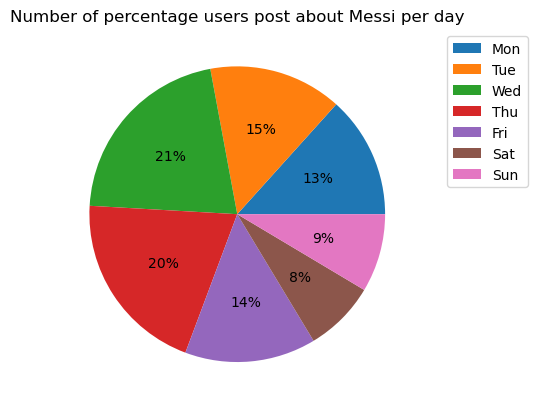

In [30]:
# autopct = lambda x: "%d" % round(x*sum(topic_count_dfList[0].head(10)['count'])/100.0)
plt.pie(day_postCount_dfList[1]['count'], labels=None, autopct="%.0f%%")
plt.legend(labels=day_postCount_dfList[1]['dayType'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Number of percentage users post about Messi per day")
plt.show()

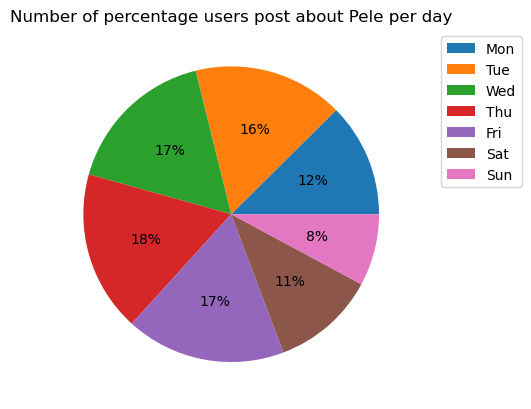

In [31]:
# autopct = lambda x: "%d" % round(x*sum(topic_count_dfList[0].head(10)['count'])/100.0)
plt.pie(day_postCount_dfList[2]['count'], labels=None, autopct="%.0f%%")
plt.legend(labels=day_postCount_dfList[2]['dayType'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Number of percentage users post about Pele per day")
plt.show()

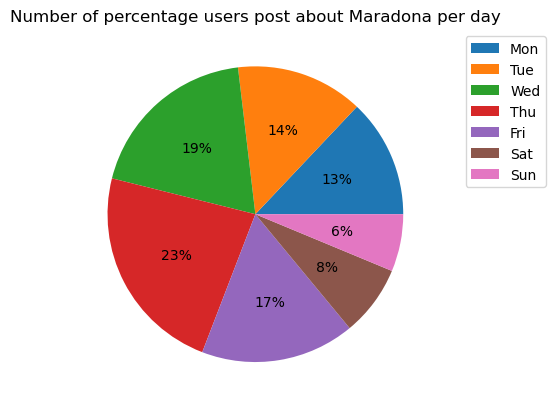

In [32]:
# autopct = lambda x: "%d" % round(x*sum(topic_count_dfList[0].head(10)['count'])/100.0)
plt.pie(day_postCount_dfList[3]['count'], labels=None, autopct="%.0f%%")
plt.legend(labels=day_postCount_dfList[3]['dayType'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Number of percentage users post about Maradona per day")
plt.show()

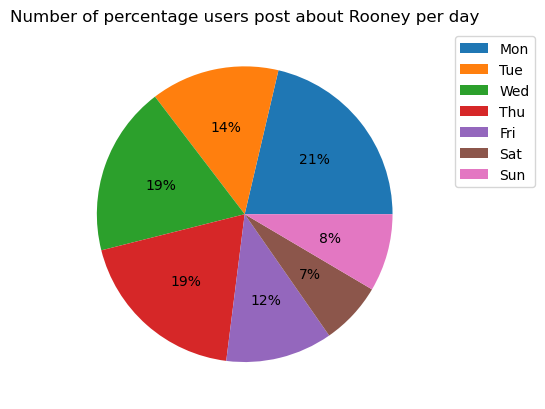

In [33]:
# autopct = lambda x: "%d" % round(x*sum(topic_count_dfList[0].head(10)['count'])/100.0)
plt.pie(day_postCount_dfList[4]['count'], labels=None, autopct="%.0f%%")
plt.legend(labels=day_postCount_dfList[4]['dayType'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Number of percentage users post about Rooney per day")
plt.show()

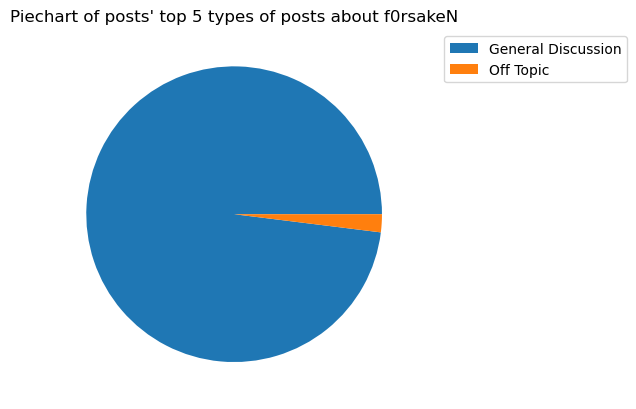

In [147]:
plt.pie(type_count_dfList[0].head(5)['count'], labels=None)
plt.legend(labels=type_count_dfList[0].head(5)['type'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of posts' top 5 types of posts about f0rsakeN")
plt.show()

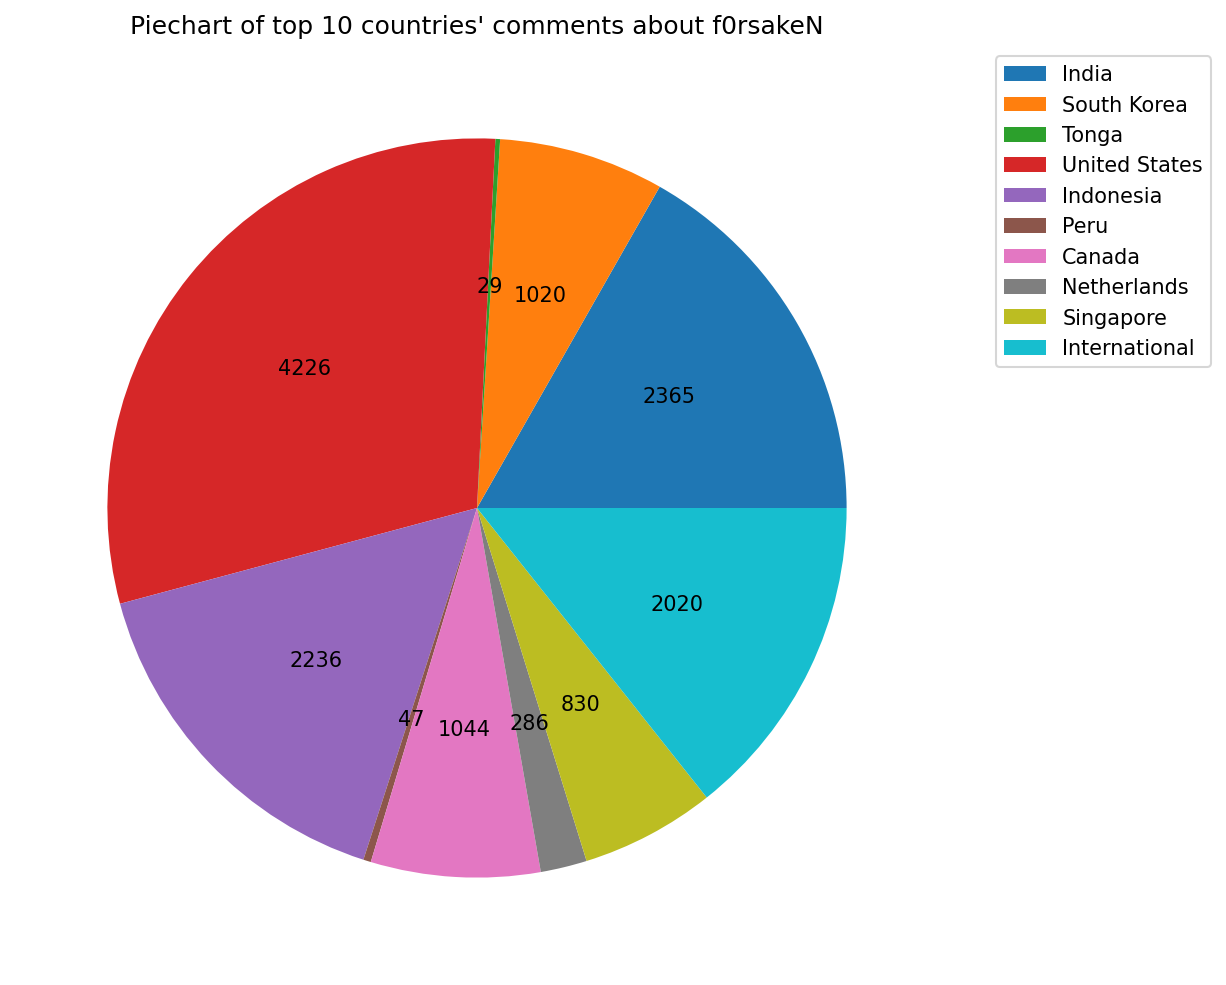

In [202]:
plt.figure(figsize=(16, 8), dpi=150) 
autopct = lambda x: "%d" % round(x*sum(country_commCount_dfList[0].head(10)['count'])/100.0)
plt.pie(country_commCount_dfList[0].head(10)['count'], labels=None, autopct=autopct)
plt.legend(labels=country_commCount_dfList[0].head(10)['country'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of top 10 countries' comments about f0rsakeN")
# plt.show()
plt.savefig("top10Countries_f0rsakeN_graph.png")

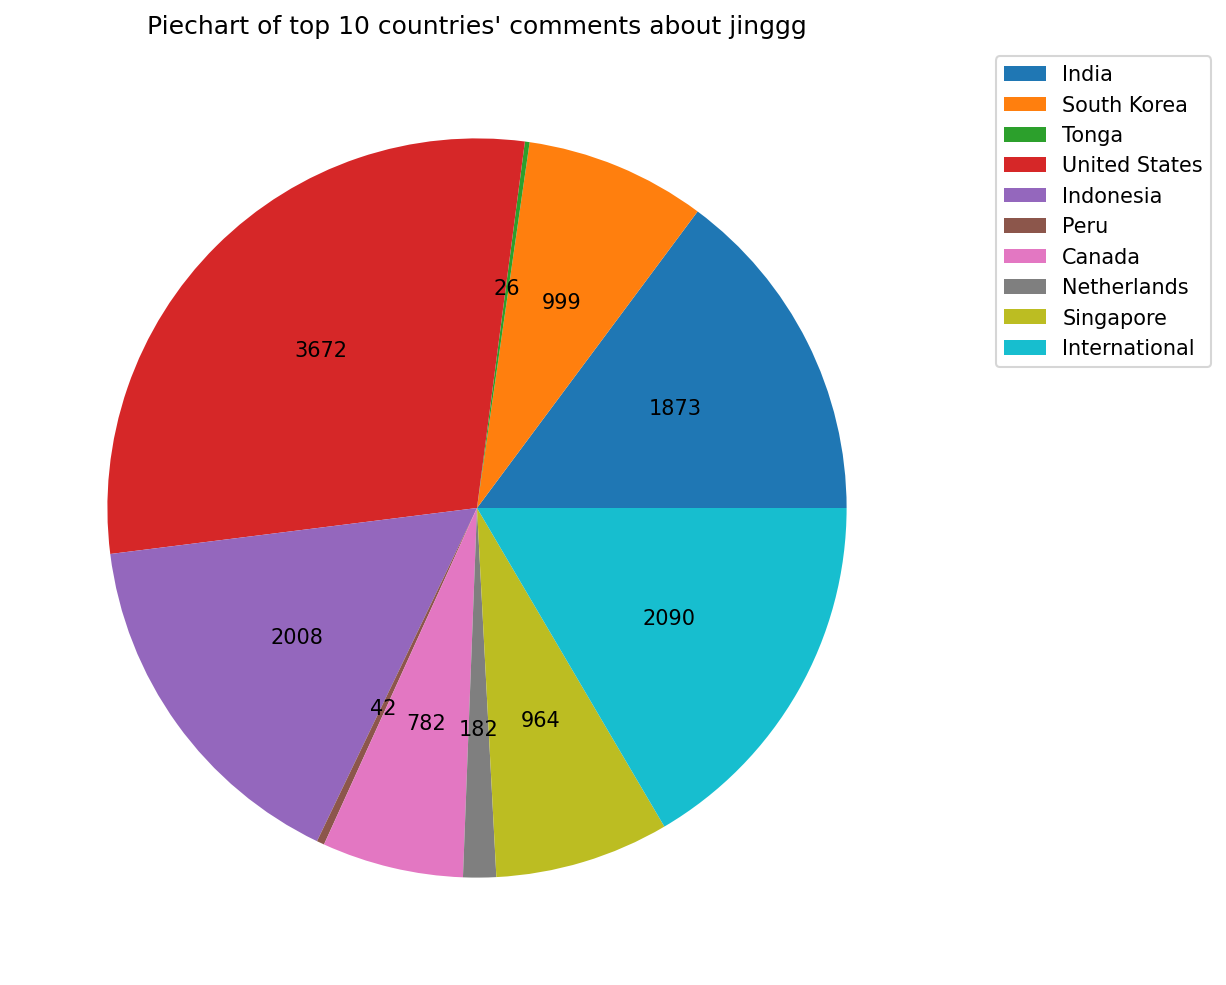

In [203]:
plt.figure(figsize=(16, 8), dpi=150) 
autopct = lambda x: "%d" % round(x*sum(country_commCount_dfList[1].head(10)['count'])/100.0)
plt.pie(country_commCount_dfList[1].head(10)['count'], labels=None, autopct=autopct)
plt.legend(labels=country_commCount_dfList[1].head(10)['country'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of top 10 countries' comments about jinggg")
# plt.show()
plt.savefig("top10Countries_jinggg_graph.png")

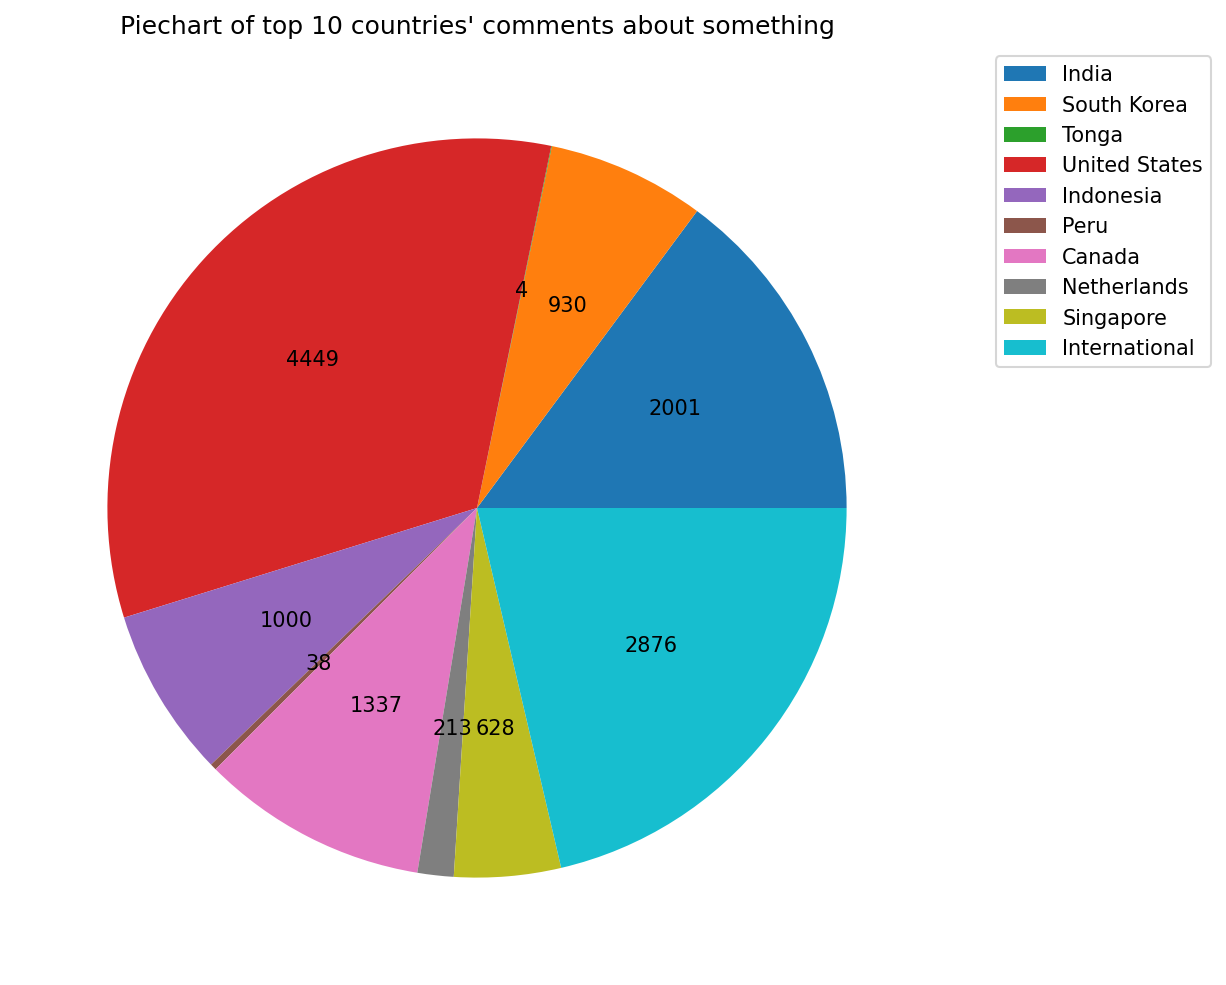

In [204]:
plt.figure(figsize=(16, 8), dpi=150) 
autopct = lambda x: "%d" % round(x*sum(country_commCount_dfList[4].head(10)['count'])/100.0)
plt.pie(country_commCount_dfList[4].head(10)['count'], labels=None, autopct=autopct)
plt.legend(labels=country_commCount_dfList[4].head(10)['country'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of top 10 countries' comments about something")
# plt.show()
plt.savefig("top10Countries_something_graph.png")

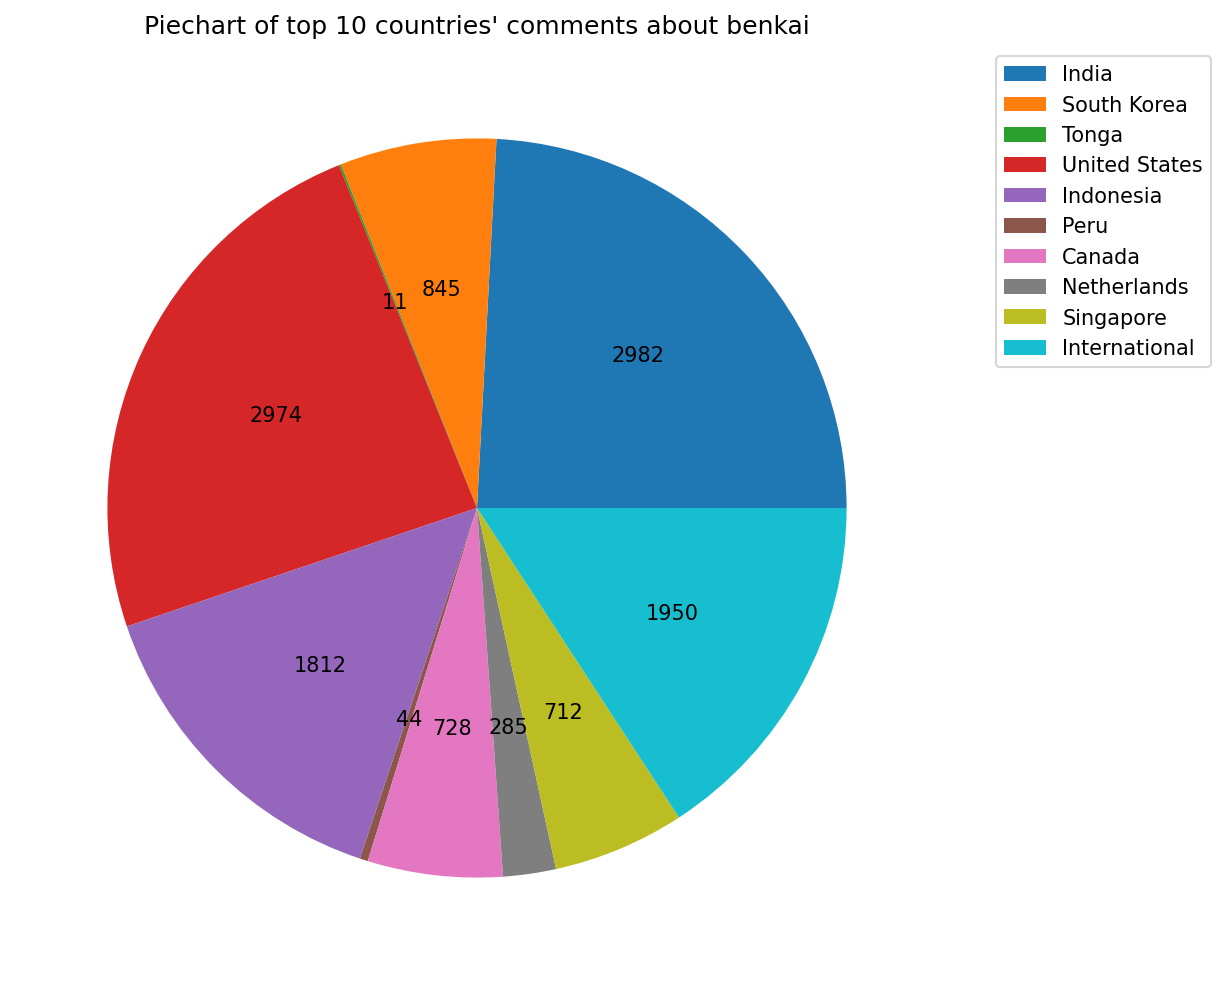

In [205]:
plt.figure(figsize=(16, 8), dpi=150) 
autopct = lambda x: "%d" % round(x*sum(country_commCount_dfList[5].head(10)['count'])/100.0)
plt.pie(country_commCount_dfList[5].head(10)['count'], labels=None, autopct=autopct)
plt.legend(labels=country_commCount_dfList[5].head(10)['country'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of top 10 countries' comments about benkai")
# plt.show()
plt.savefig("top10Countries_benkai_graph.png")

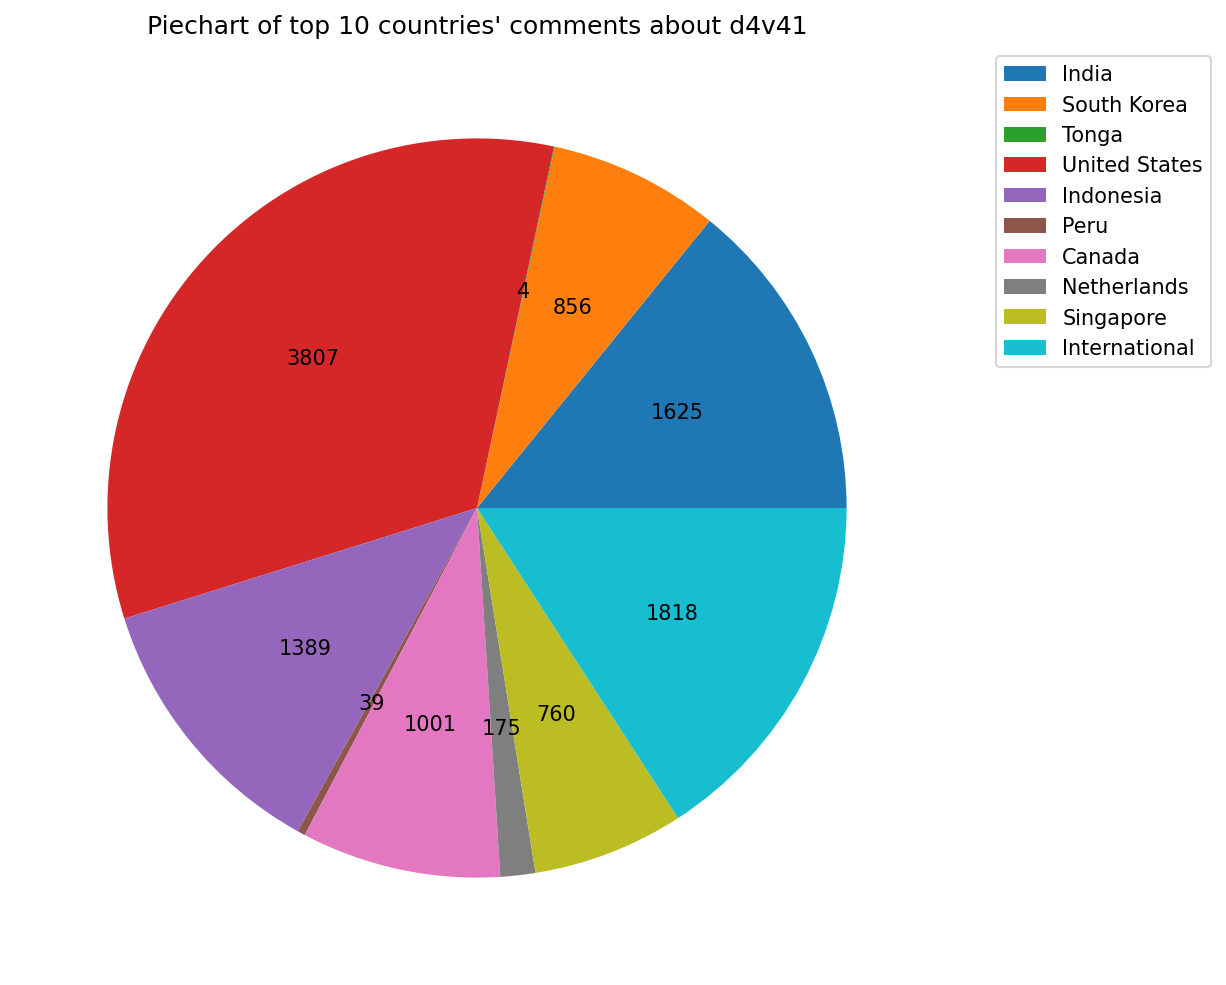

In [206]:
plt.figure(figsize=(16, 8), dpi=150) 
autopct = lambda x: "%d" % round(x*sum(country_commCount_dfList[2].head(10)['count'])/100.0)
plt.pie(country_commCount_dfList[2].head(10)['count'], labels=None, autopct=autopct)
plt.legend(labels=country_commCount_dfList[2].head(10)['country'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of top 10 countries' comments about d4v41")
# plt.show()
plt.savefig("top10Countries_d4v41_graph.png")

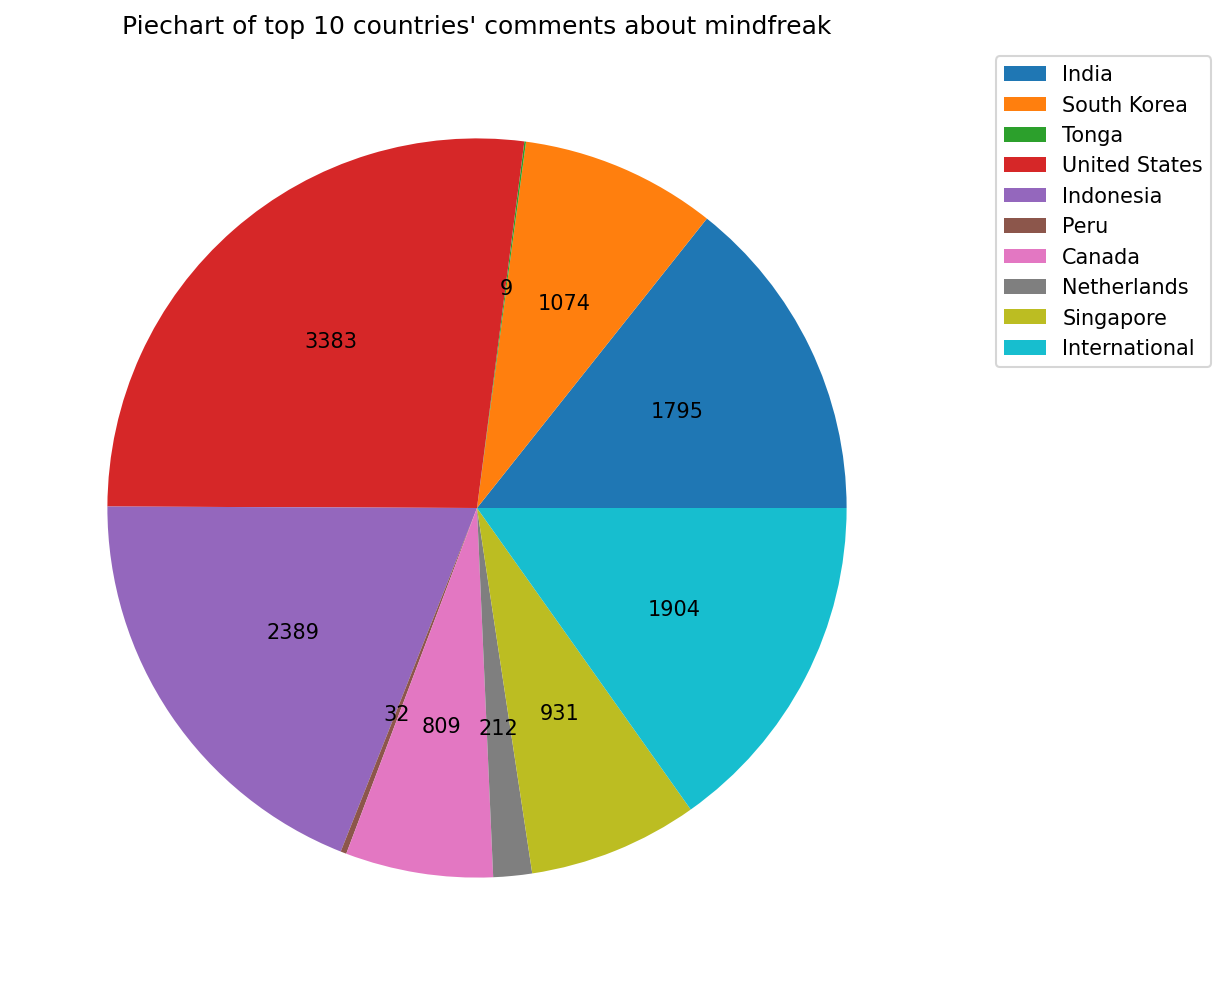

In [207]:
plt.figure(figsize=(16, 8), dpi=150) 
autopct = lambda x: "%d" % round(x*sum(country_commCount_dfList[3].head(10)['count'])/100.0)
plt.pie(country_commCount_dfList[3].head(10)['count'], labels=None, autopct=autopct)
plt.legend(labels=country_commCount_dfList[3].head(10)['country'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of top 10 countries' comments about mindfreak")
# plt.show()
plt.savefig("top10Countries_mindfreak_graph.png")

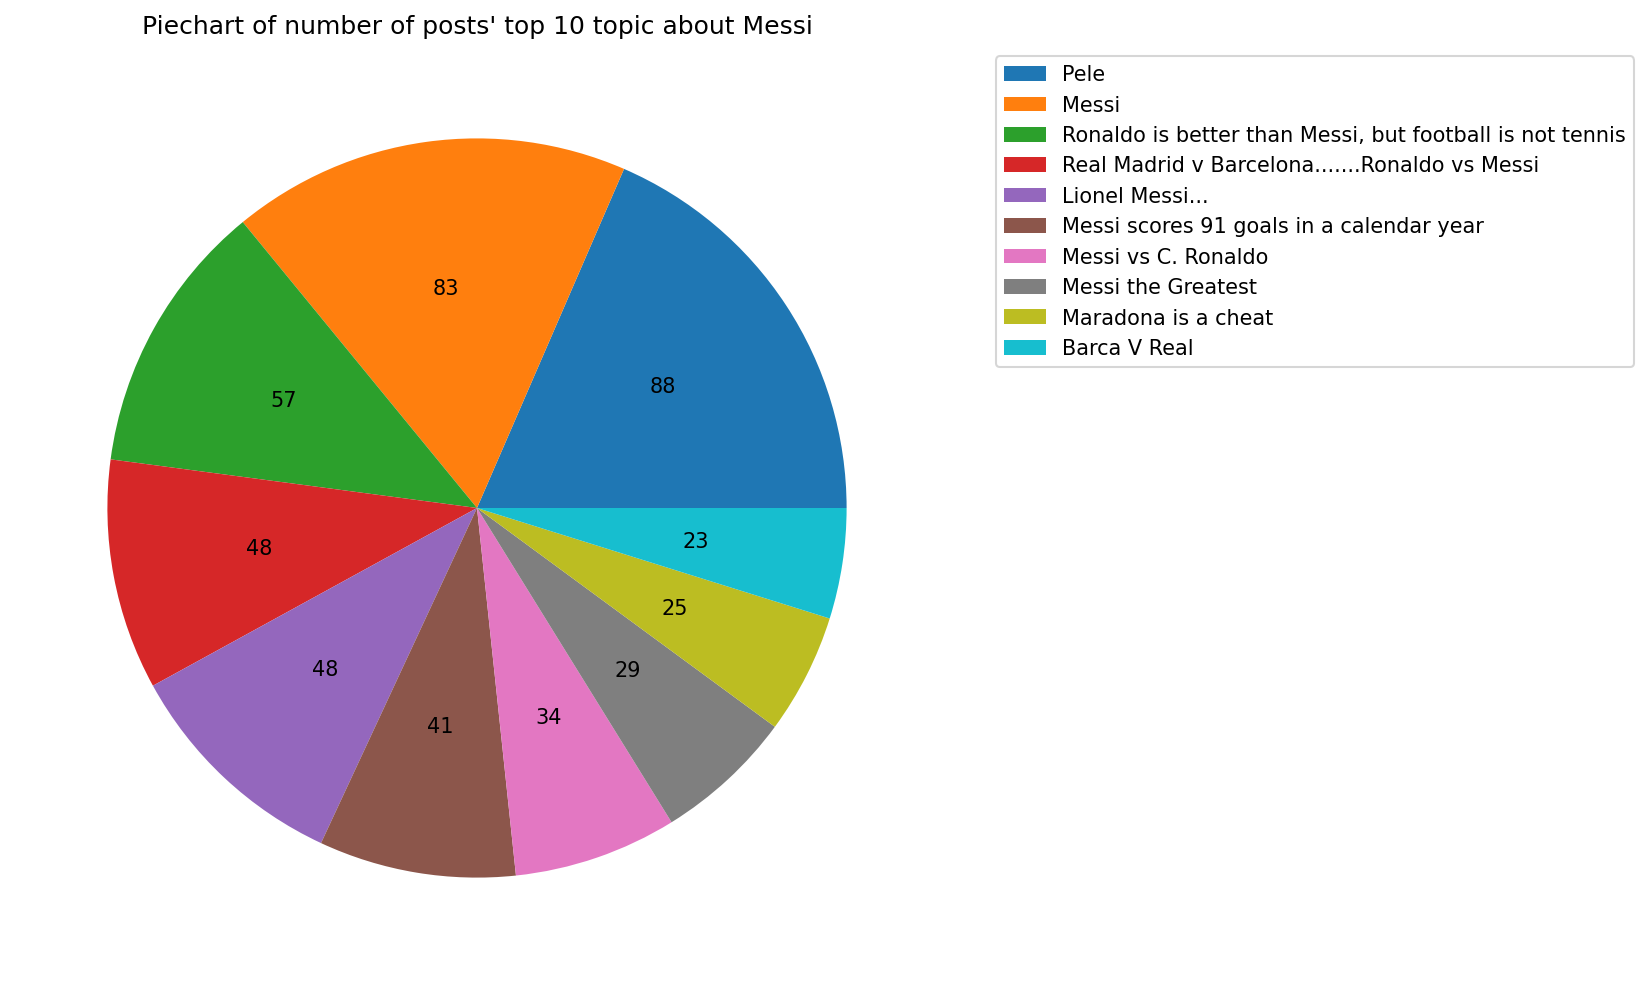

In [38]:
plt.figure(figsize=(16, 8), dpi=150) 
autopct = lambda x: "%d" % round(x*sum(topic_count_dfList[1].head(10)['count'])/100.0)
plt.pie(topic_count_dfList[1].head(10)['count'], labels=None, autopct=autopct)
plt.legend(labels=topic_count_dfList[1].head(10)['topic'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of number of posts' top 10 topic about Messi")
# plt.show()
plt.savefig("top10Topic_messi_graph.png")

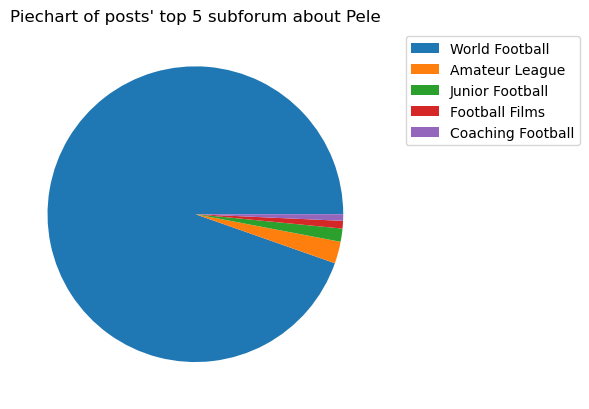

In [39]:
plt.pie(subforum_count_dfList[2].head(5)['count'], labels=None)
plt.legend(labels=subforum_count_dfList[2].head(5)['subforum'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of posts' top 5 subforum about Pele")
plt.show()

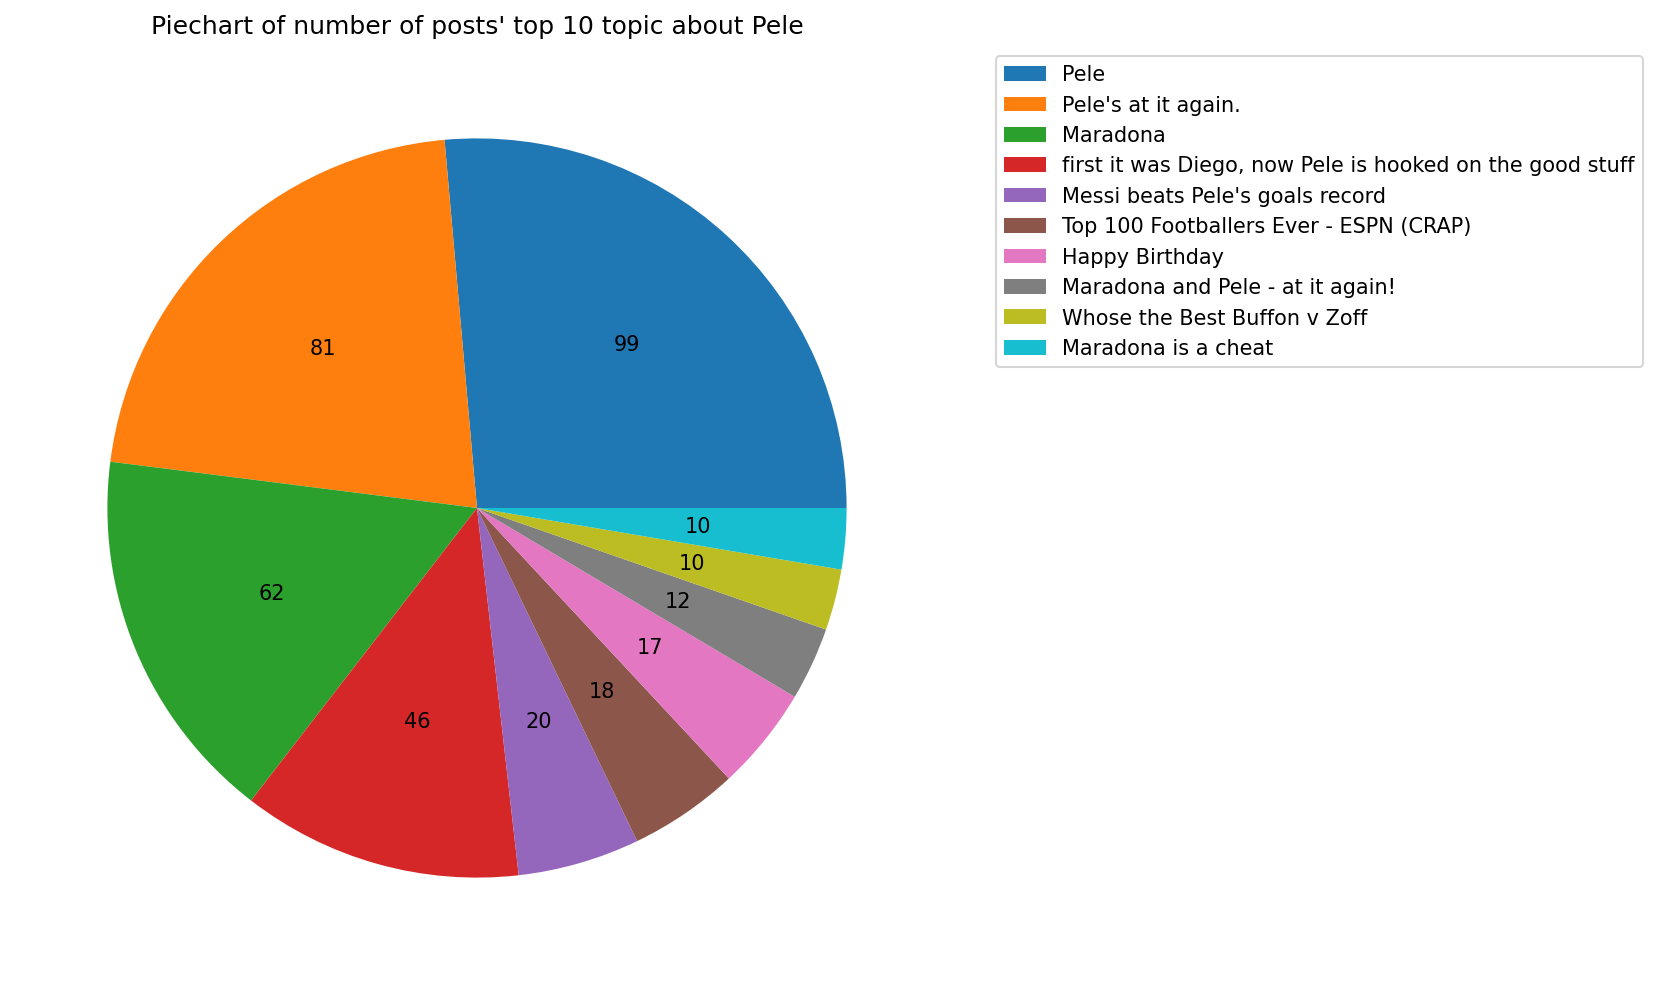

In [40]:
plt.figure(figsize=(16, 8), dpi=150) 
autopct = lambda x: "%d" % round(x*sum(topic_count_dfList[2].head(10)['count'])/100.0)
plt.pie(topic_count_dfList[2].head(10)['count'], labels=None, autopct=autopct)
plt.legend(labels=topic_count_dfList[2].head(10)['topic'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of number of posts' top 10 topic about Pele")
# plt.show()
plt.savefig("top10Topic_pele_graph.png")

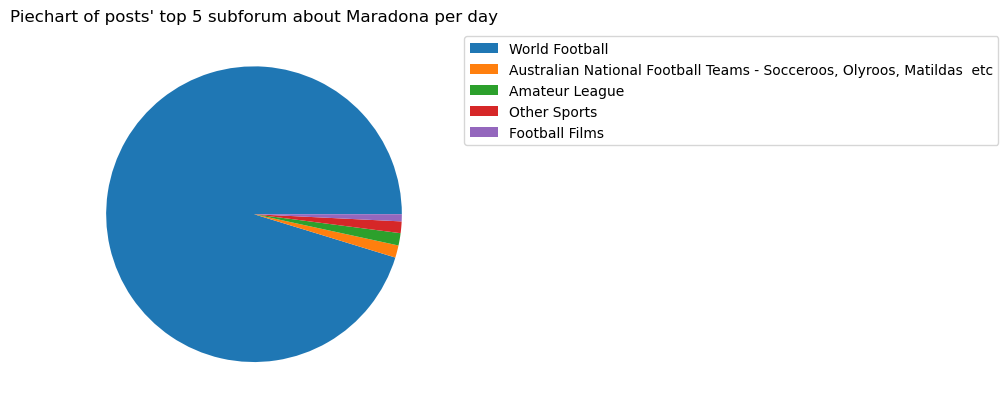

In [41]:
plt.pie(subforum_count_dfList[3].head(5)['count'], labels=None)
plt.legend(labels=subforum_count_dfList[3].head(5)['subforum'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of posts' top 5 subforum about Maradona per day")
plt.show()

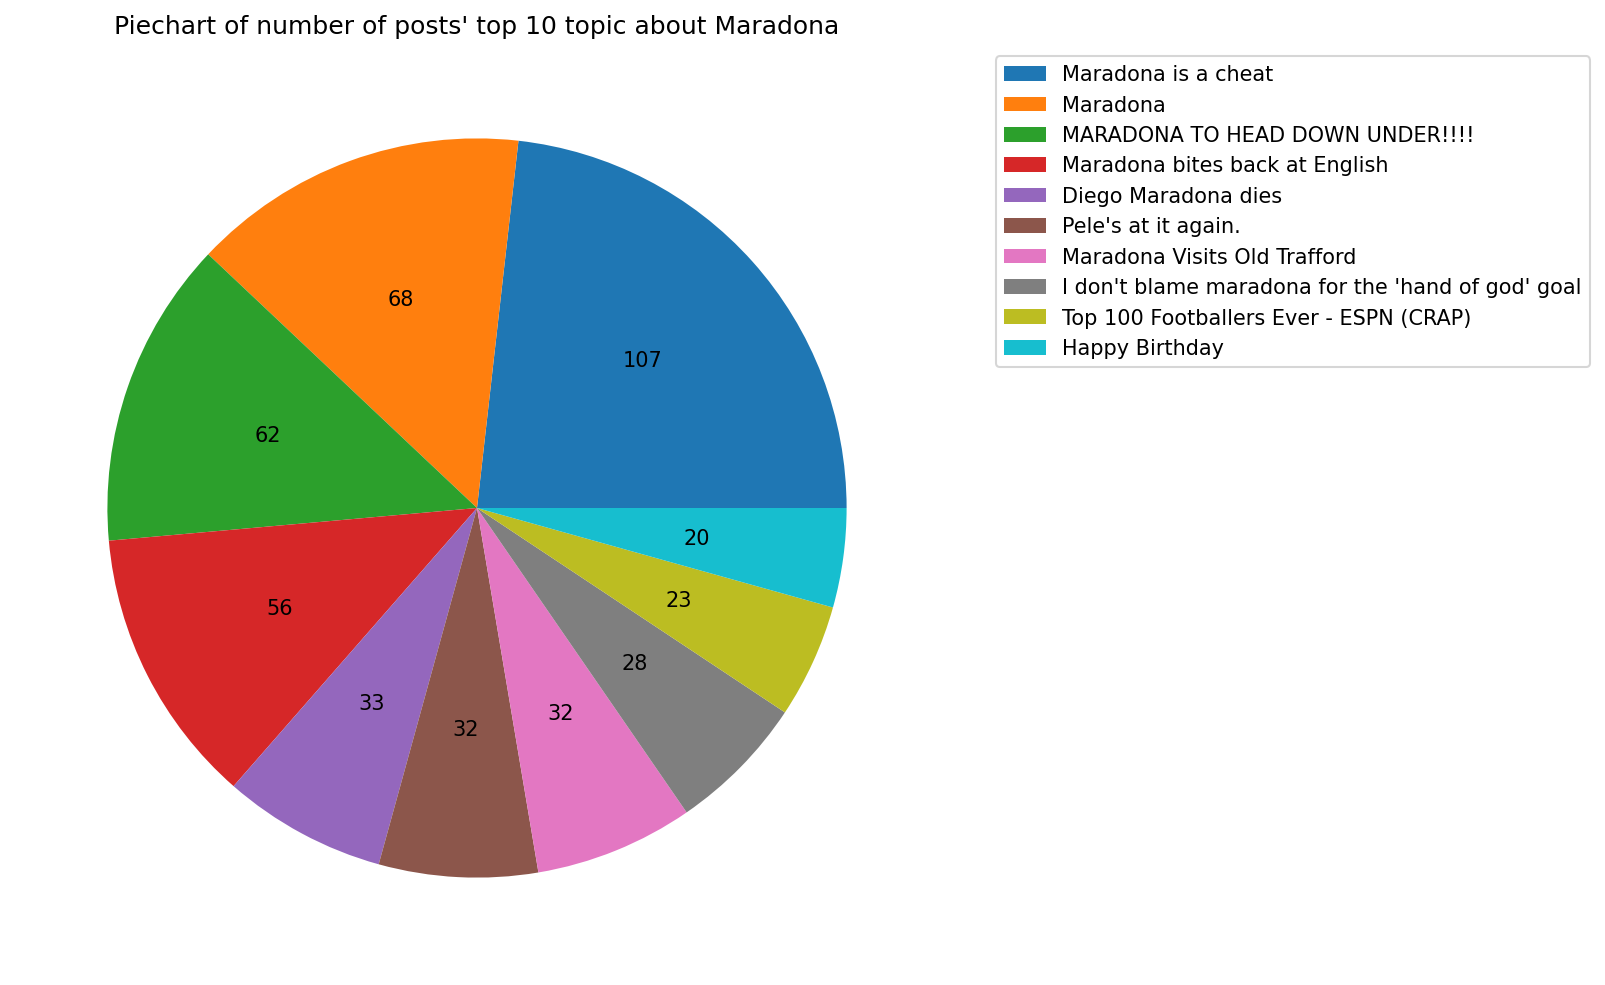

In [42]:
plt.figure(figsize=(16, 8), dpi=150) 
autopct = lambda x: "%d" % round(x*sum(topic_count_dfList[3].head(10)['count'])/100.0)
plt.pie(topic_count_dfList[3].head(10)['count'], labels=None, autopct=autopct)
plt.legend(labels=topic_count_dfList[3].head(10)['topic'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of number of posts' top 10 topic about Maradona")
# plt.show()
plt.savefig("top10Topic_maradona_graph.png")

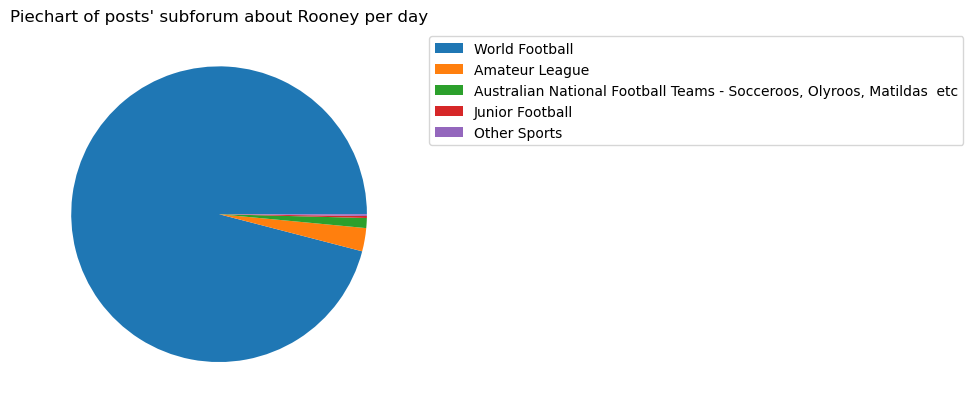

In [43]:
plt.pie(subforum_count_dfList[4].head(5)['count'], labels=None)
plt.legend(labels=subforum_count_dfList[4].head(5)['subforum'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of posts' subforum about Rooney per day")
plt.show()

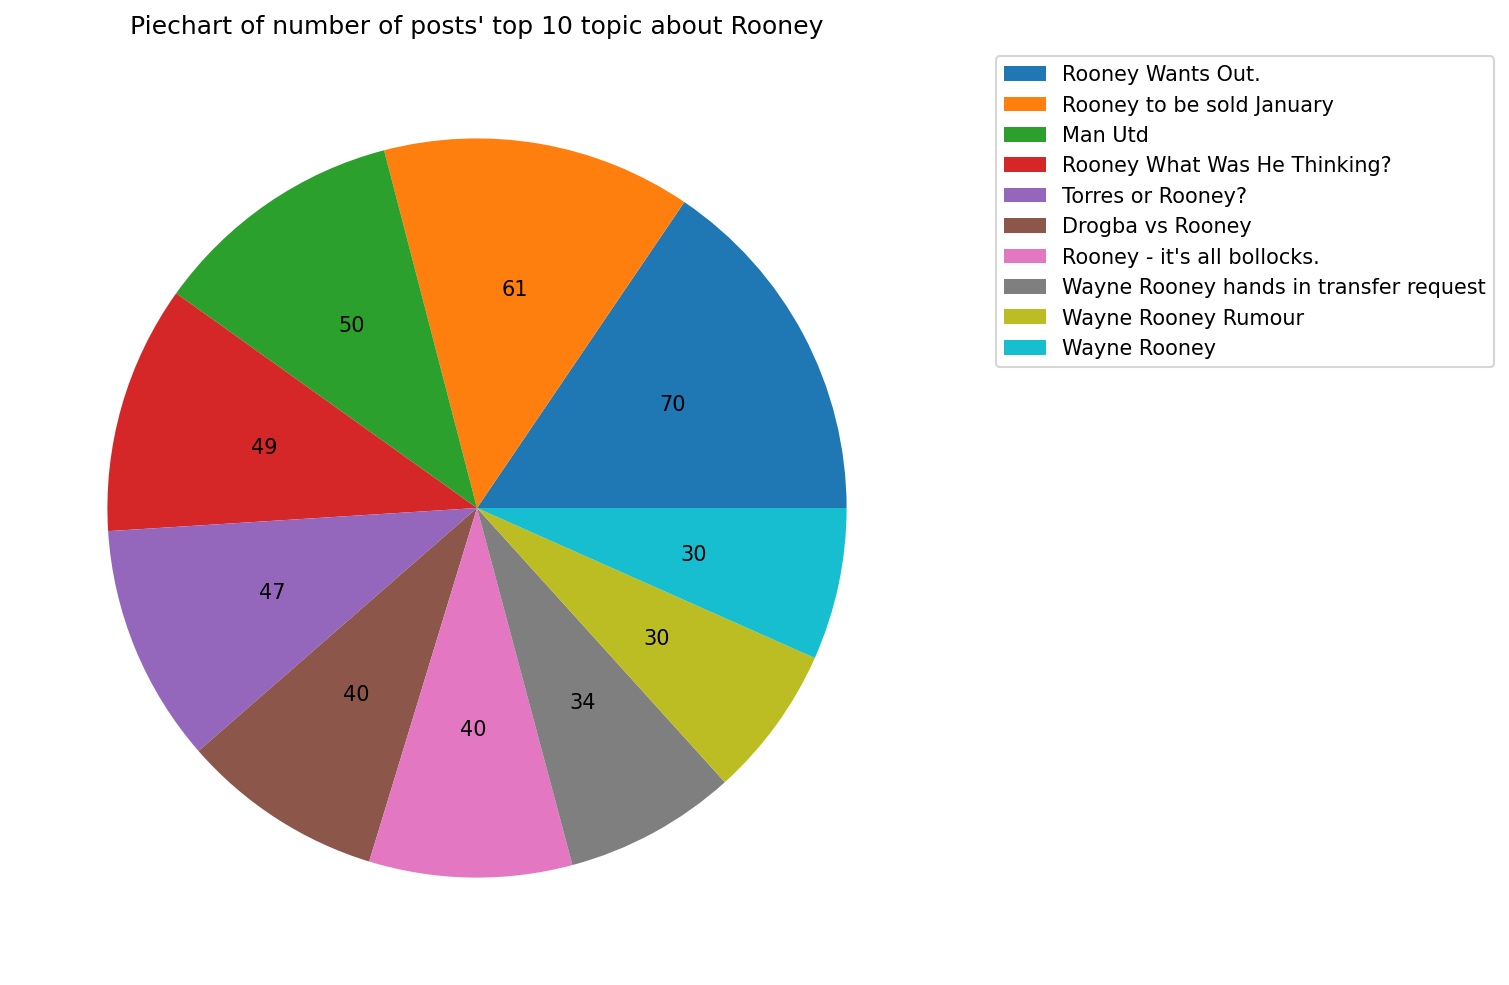

In [44]:
plt.figure(figsize=(16, 8), dpi=150) 
autopct = lambda x: "%d" % round(x*sum(topic_count_dfList[4].head(10)['count'])/100.0)
plt.pie(topic_count_dfList[4].head(10)['count'], labels=None, autopct=autopct)
plt.legend(labels=topic_count_dfList[4].head(10)['topic'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Piechart of number of posts' top 10 topic about Rooney")
# plt.show()
plt.savefig("top10Topic_rooney_graph.png")

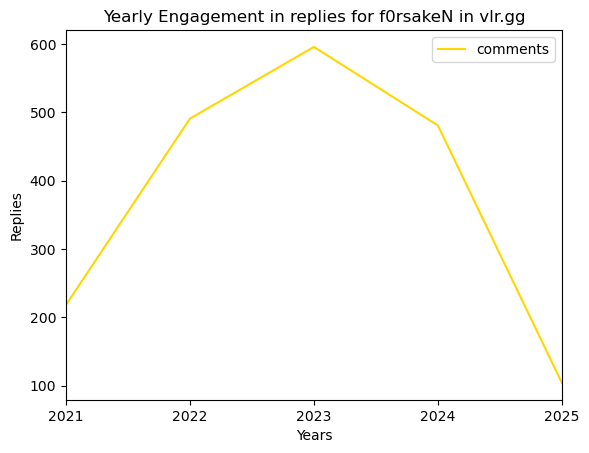

In [148]:
new_series_list_f0rsakeN = comm_count_dfList[0].resample('1Y').sum()
new_series_list_f0rsakeN.plot(label='f0rsakeN', color='gold')
plt.title("Yearly Engagement in replies for f0rsakeN in vlr.gg")
    
plt.xlabel('Years') 
plt.ylabel('Replies')
plt.savefig('yearlyEngagement_f0rsakeN.png')

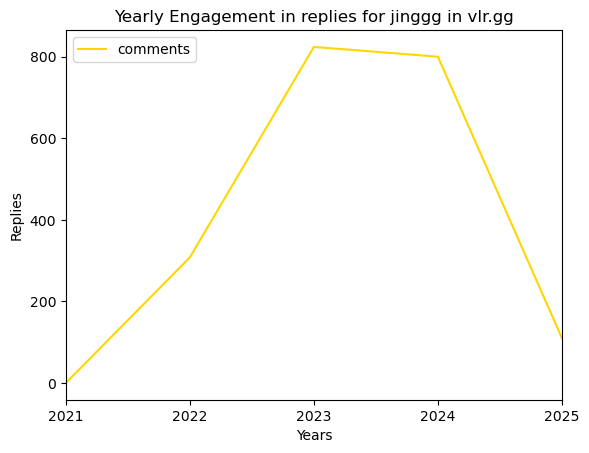

In [149]:
new_series_list_jinggg = comm_count_dfList[1].resample('1Y').sum()
new_series_list_jinggg.plot(label='jinggg', color='gold')
plt.title("Yearly Engagement in replies for jinggg in vlr.gg")
    
plt.xlabel('Years') 
plt.ylabel('Replies')
plt.savefig('yearlyEngagement_jinggg.png')

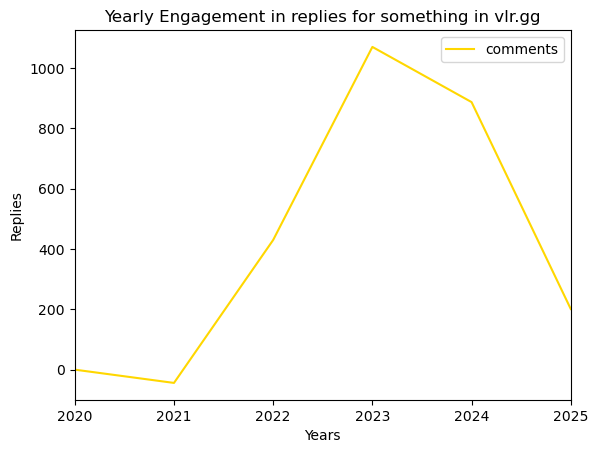

In [150]:
new_series_list_something = comm_count_dfList[4].resample('1Y').sum()
new_series_list_something.plot(label='something', color='gold')
plt.title("Yearly Engagement in replies for something in vlr.gg")
    
plt.xlabel('Years') 
plt.ylabel('Replies')
plt.savefig('yearlyEngagement_something.png')

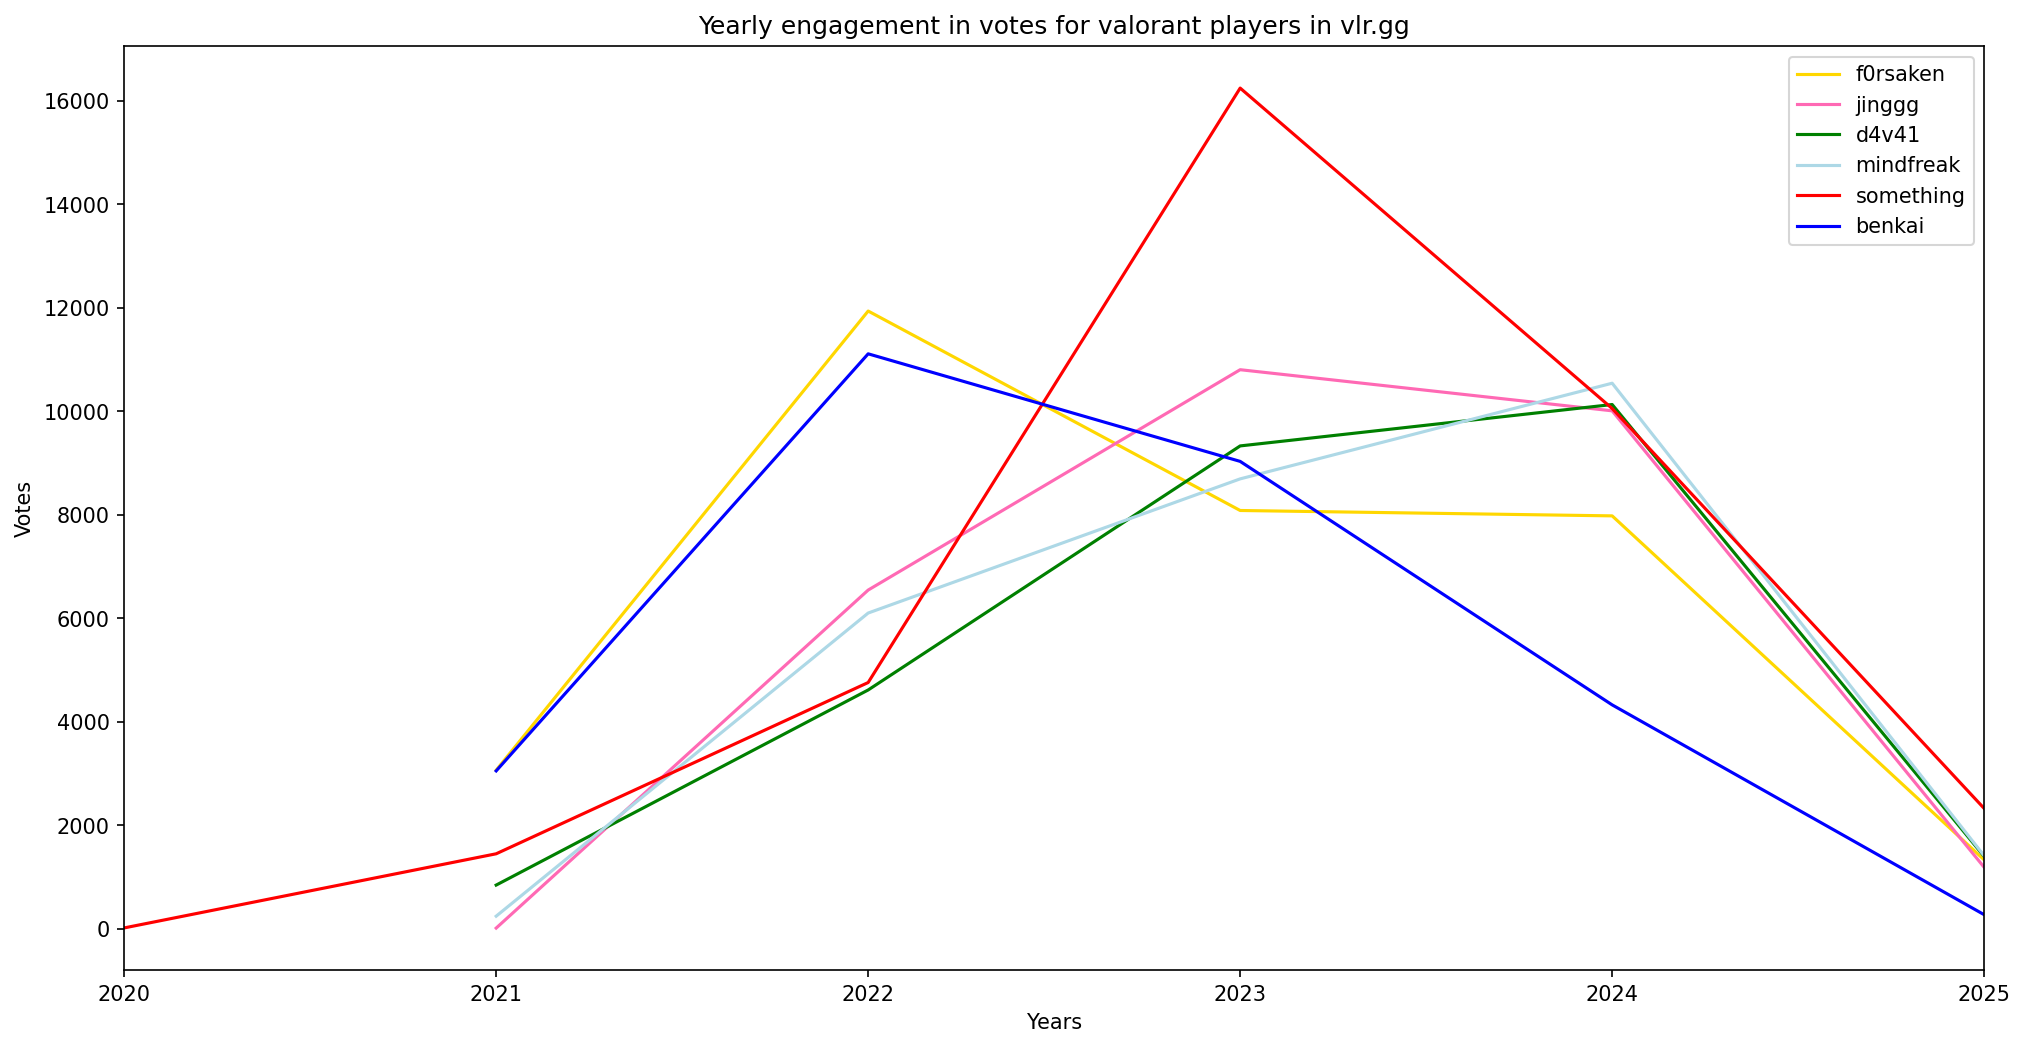

In [154]:
comparePlotTS(playerNames, vote_count_dfList, '1Y', 'votes')
plt.savefig('yearlyEngagement_voteThread_graph.png')

In [ ]:
comm_count_dfList

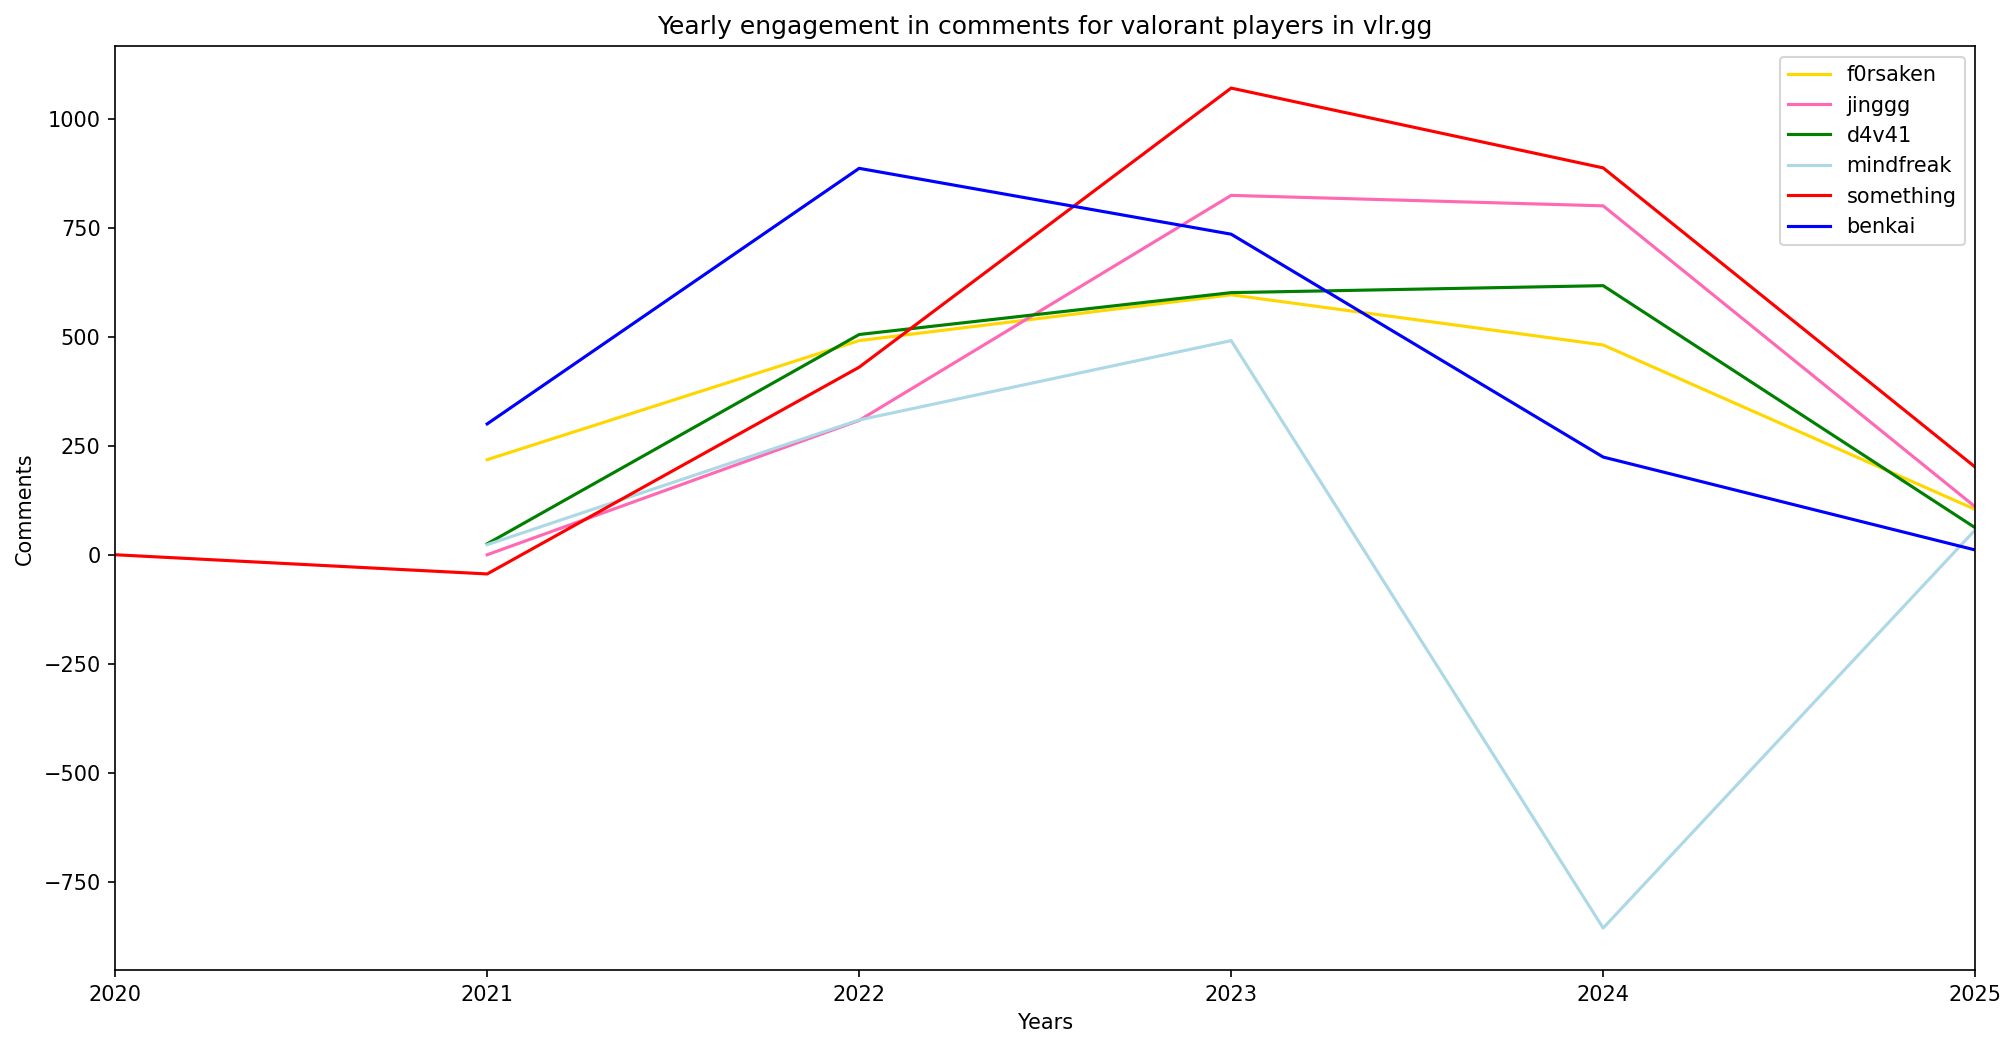

In [155]:
comparePlotTS(playerNames, comm_count_dfList, '1Y', 'comments')
plt.savefig('yearlyEngagement_commThread_graph.png')

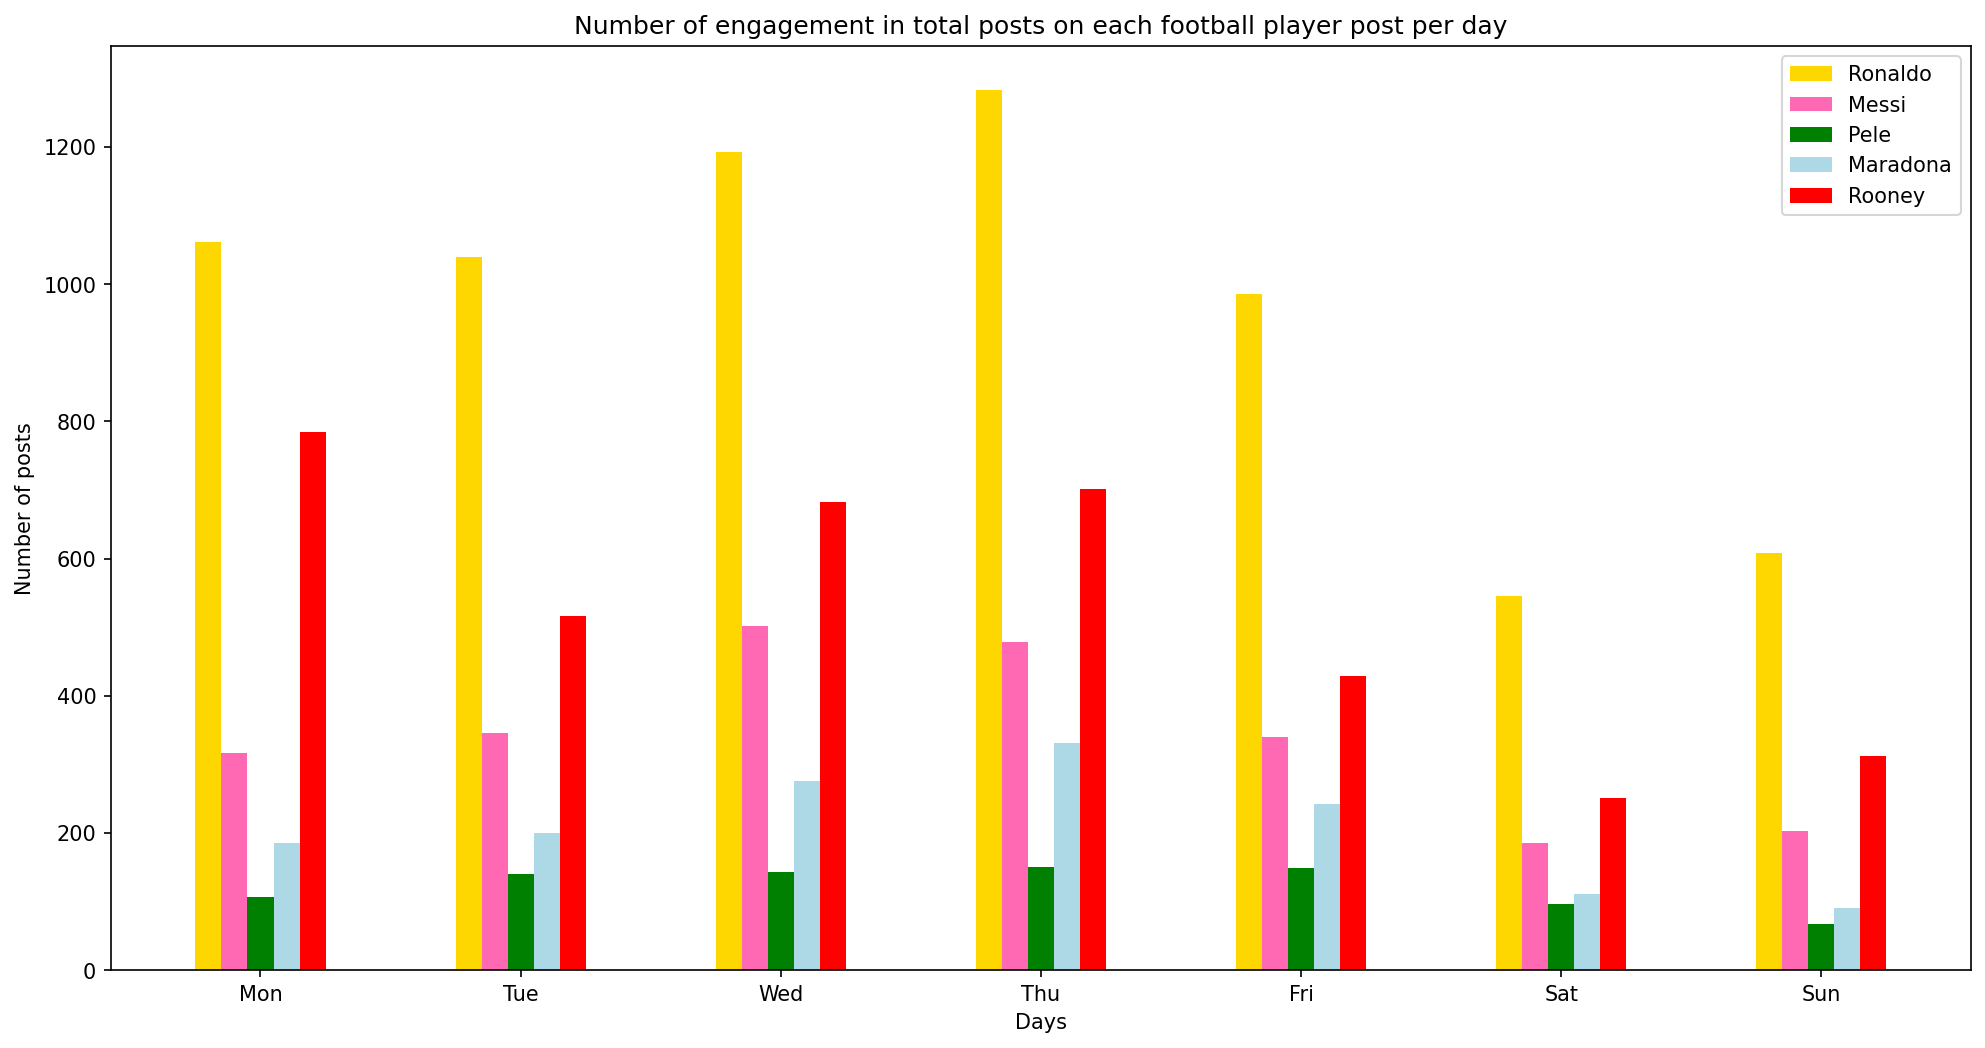

In [49]:
plt.figure(figsize=(16, 8), dpi=150) 
X = np.arange(7)
offset = 0.1

plt.bar(X - 0.2, day_postCount_dfList[0]['count'], color = colorList[0], width = 0.1, label = playerNames[0])
plt.bar(X - 0.1, day_postCount_dfList[1]['count'], color = colorList[1], width = 0.1, label = playerNames[1])
plt.bar(X, day_postCount_dfList[2]['count'], color = colorList[2], width = 0.1, label = playerNames[2])
plt.bar(X + 0.1, day_postCount_dfList[3]['count'], color = colorList[3], width = 0.1, label = playerNames[3])
plt.bar(X + 0.2, day_postCount_dfList[4]['count'], color = colorList[4], width = 0.1, label = playerNames[4])

plt.xticks(X, day_postCount_dfList[0]['dayType']) 
plt.xlabel("Days") 
plt.ylabel("Number of posts") 
plt.title("Number of engagement in total posts on each football player post per day") 
plt.legend()
plt.show()

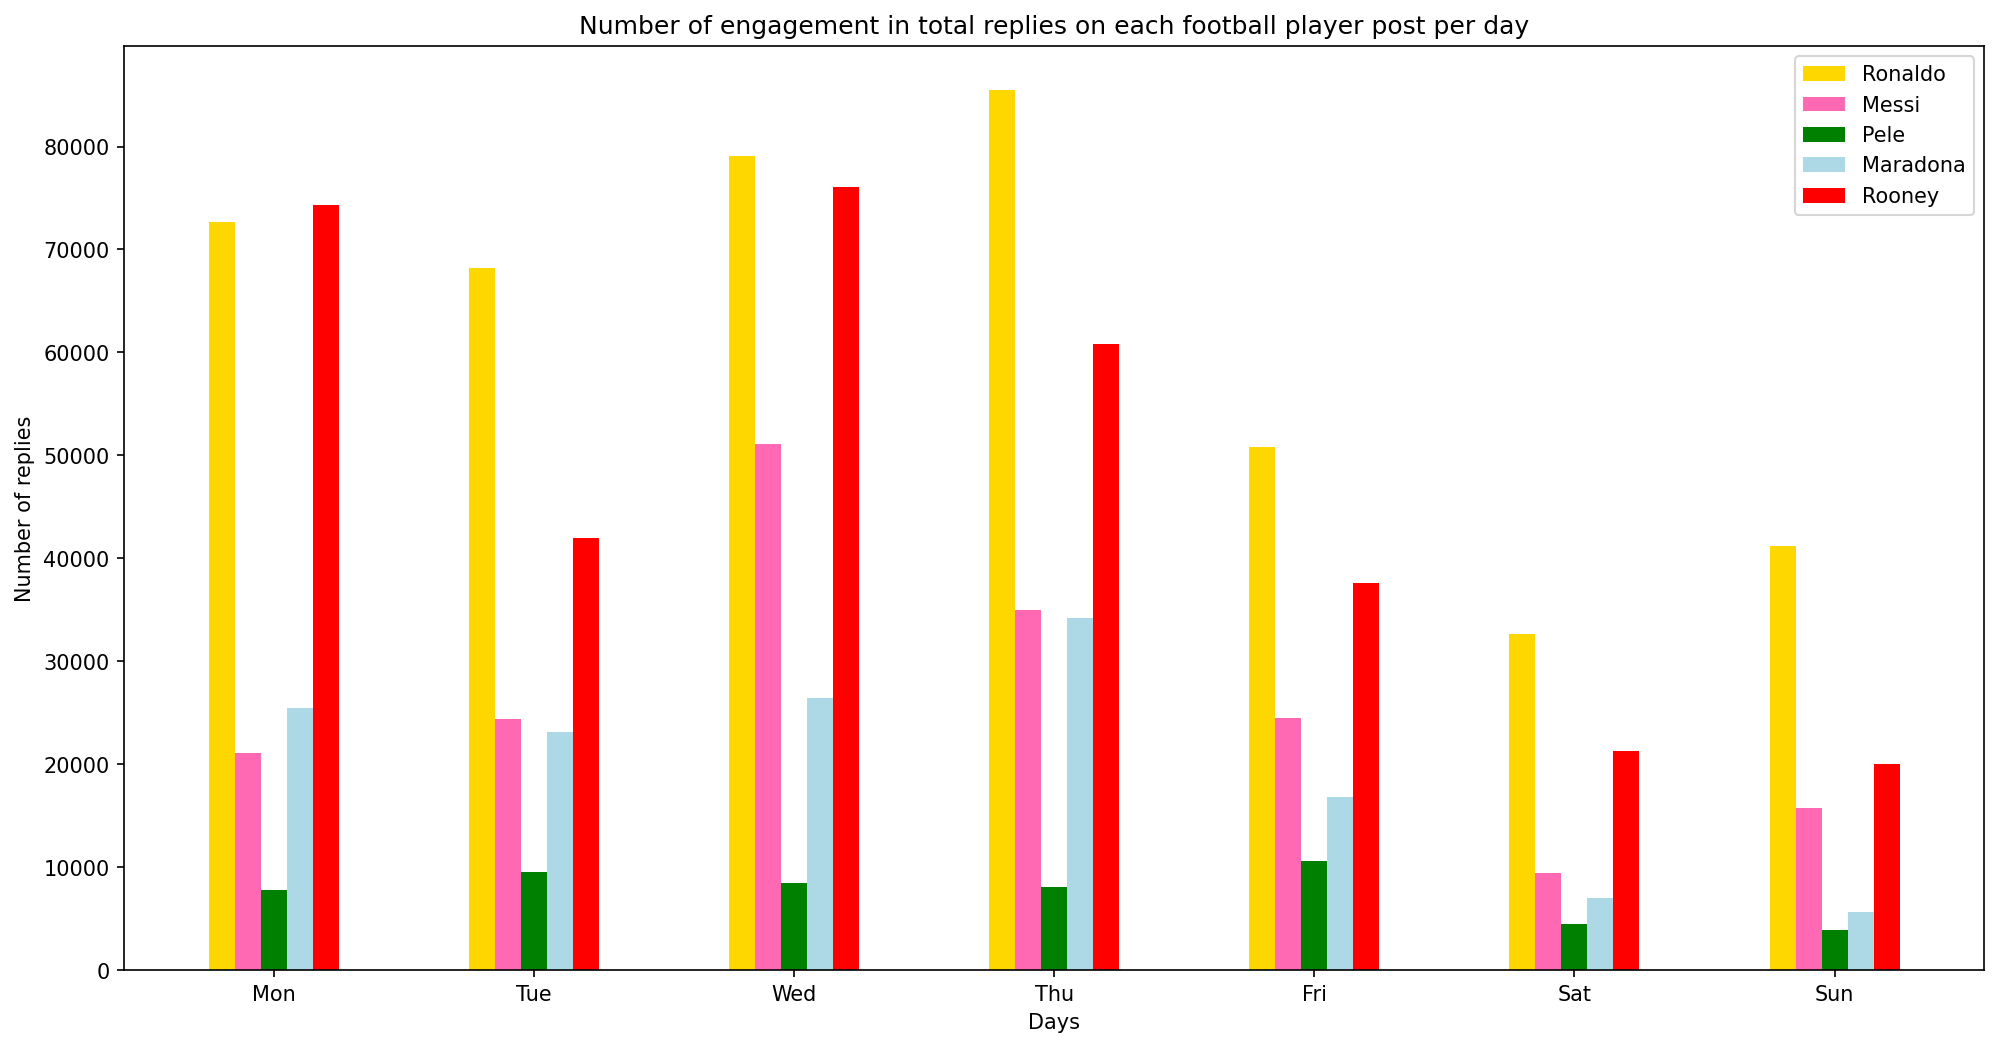

In [50]:
plt.figure(figsize=(16, 8), dpi=150) 
X = np.arange(7)
offset = 0.1

plt.bar(X - 0.2, day_postReplies_dfList[0]['replies'], color = colorList[0], width = 0.1, label = playerNames[0])
plt.bar(X - 0.1, day_postReplies_dfList[1]['replies'], color = colorList[1], width = 0.1, label = playerNames[1])
plt.bar(X, day_postReplies_dfList[2]['replies'], color = colorList[2], width = 0.1, label = playerNames[2])
plt.bar(X + 0.1, day_postReplies_dfList[3]['replies'], color = colorList[3], width = 0.1, label = playerNames[3])
plt.bar(X + 0.2, day_postReplies_dfList[4]['replies'], color = colorList[4], width = 0.1, label = playerNames[4])

plt.xticks(X, day_postReplies_dfList[0]['dayType']) 
plt.xlabel("Days") 
plt.ylabel("Number of replies") 
plt.title("Number of engagement in total replies on each football player post per day") 
plt.legend()
plt.show()

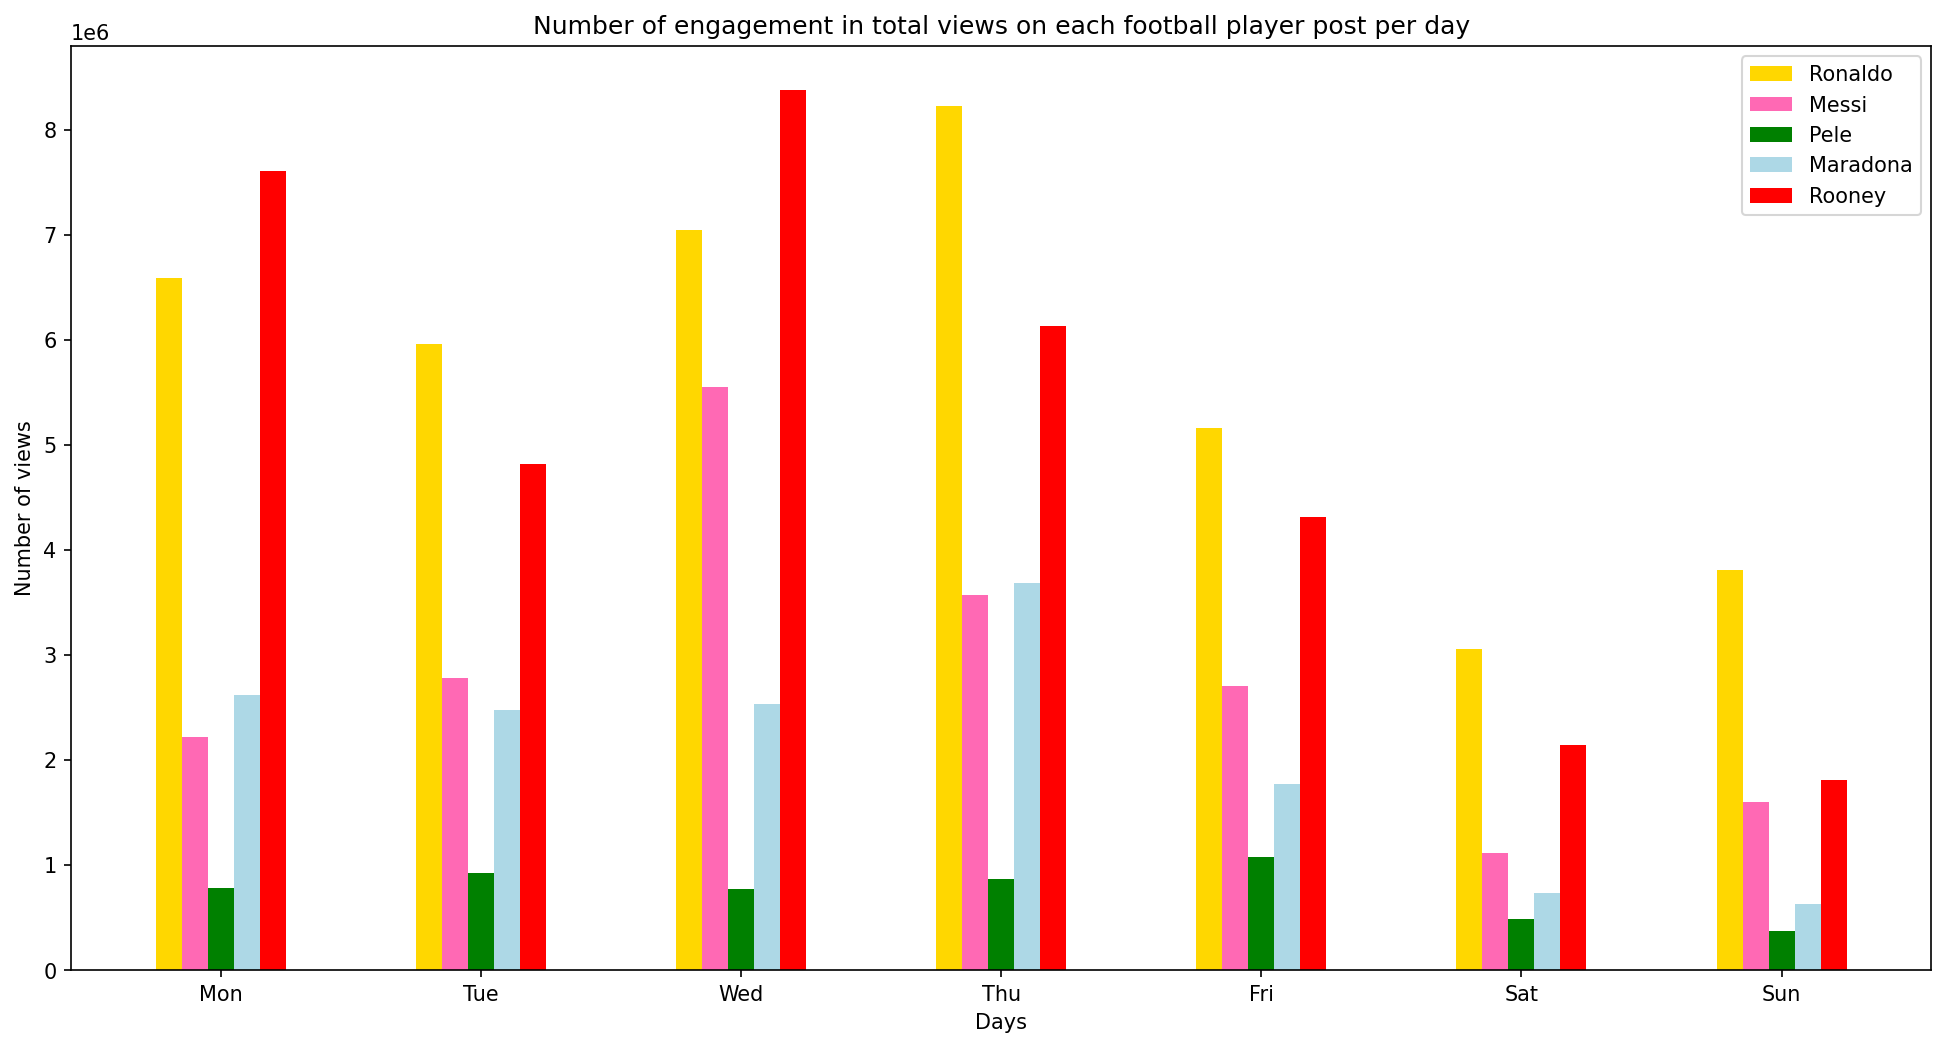

In [51]:
plt.figure(figsize=(16, 8), dpi=150) 
X = np.arange(7)
offset = 0.1

plt.bar(X - 0.2, day_postViews_dfList[0]['views'], color = colorList[0], width = 0.1, label = playerNames[0])
plt.bar(X - 0.1, day_postViews_dfList[1]['views'], color = colorList[1], width = 0.1, label = playerNames[1])
plt.bar(X, day_postViews_dfList[2]['views'], color = colorList[2], width = 0.1, label = playerNames[2])
plt.bar(X + 0.1, day_postViews_dfList[3]['views'], color = colorList[3], width = 0.1, label = playerNames[3])
plt.bar(X + 0.2, day_postViews_dfList[4]['views'], color = colorList[4], width = 0.1, label = playerNames[4])

plt.xticks(X, day_postViews_dfList[0]['dayType']) 
plt.xlabel("Days") 
plt.ylabel("Number of views") 
plt.title("Number of engagement in total views on each football player post per day") 
plt.legend()
plt.show()

In [161]:
# using regex tokenizer to be more 'precise'
reg_tokenizer = RegexpTokenizer(regexpr)

# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)
# use stopwords from nltk, a few other twitter specific terms like 'TIL' and 'AMA', and the word 'esport' specifically
lStopwords = nltk.corpus.stopwords.words('english') + lPunct
# Using the Porter stemmer
redditStemmer = nltk.stem.PorterStemmer()

In [209]:
def termFreqCountFunc_titleThread(data, counter):
    for i in range(len(data)):
        text_preproc = data['title'][i]
        # tokenise, filter stopwords and get convert to lower case
        lTokens = proc_text(text=text_preproc, tokenizer=reg_tokenizer, stemmer=redditStemmer, stopwords=lStopwords)

        # update count
        counter.update(lTokens)

In [208]:
def termFreqCountFunc_comm(data, counter):
    for i in range(len(data)):
        text_preproc = data['comment'][i]
        # tokenise, filter stopwords and get convert to lower case
        lTokens = proc_text(text=text_preproc, tokenizer=reg_tokenizer, stemmer=redditStemmer, stopwords=lStopwords)

        # update count
        counter.update(lTokens)

In [166]:
def termFreqTabulateFunc(tabulate_list, count_list):
    for i in range(num_freq_term+1):
        tabulate_list.append(list())
        if i == 0:
            tabulate_list[i] = playerNames
        else:
            for j in range(len(playerNames)):
                currStr = ""
                currWord = count_list[j].most_common(num_freq_term)[i-1][0]
                currFreq = str(count_list[j].most_common(num_freq_term)[i-1][1])
                currStr += currWord + ": " + currFreq
                tabulate_list[i].append(currStr)

In [ ]:
term_freq_count_threadTitle_list = []
for i in range(len(playerNames)):
    term_freq_count_threadTitle_list.append(Counter())
    termFreqCountFunc_titleThread(dataThreadLst_clean_text[i], term_freq_count_threadTitle_list[i])

term_freq_tabulate_list = []
termFreqTabulateFunc(term_freq_tabulate_list, term_freq_count_threadTitle_list)

In [169]:
# print(tabulate(term_freq_tabulate_list, headers='firstrow', tablefmt='fancy_grid'))
print(tabulate(term_freq_tabulate_list, headers='firstrow'))

f0rsaken       jinggg        d4v41          mindfreak       something    benkai
-------------  ------------  -------------  --------------  -----------  -----------
f0rsaken: 301  jinggg: 378   prx: 201       mindfreak: 247  someth: 659  benkai: 202
player: 145    prx: 190      player: 176    prx: 187        prx: 120     prx: 134
prx: 108       player: 111   top: 110       player: 112     come: 36     ge: 77
best: 93       best: 78      best: 79       top: 64         player: 36   player: 73
top: 80        top: 69       team: 72       best: 50        vs: 36       team: 58
team: 48       raze: 39      d4v41: 70      team: 49        top: 26      best: 43
vs: 31         vs: 36        vct: 36        monyet: 38      demon1: 23   top: 40
goat: 28       come: 35      region: 31     control: 32     say: 22      come: 36
valor: 26      monyet: 35    roster: 30     come: 26        team: 19     igl: 33
jett: 26       team: 30      role: 28       rex: 24         fan: 18      valor: 29
role: 25     

In [210]:
term_freq_count_comms_list = []
for i in range(len(playerNames)):
    term_freq_count_comms_list.append(Counter())
    termFreqCountFunc_comm(dataCommLst_clean_comm[i], term_freq_count_comms_list[i])

term_freq_tabulate_comm_list = []
termFreqTabulateFunc(term_freq_tabulate_comm_list, term_freq_count_comms_list)

In [211]:
# print(tabulate(term_freq_tabulate_comm_list, headers='firstrow', tablefmt='fancy_grid'))
print(tabulate(term_freq_tabulate_comm_list, headers='firstrow'))

f0rsaken        jinggg        d4v41           mindfreak        something     benkai
--------------  ------------  --------------  ---------------  ------------  ------------
team: 2859      jinggg: 3122  player: 2616    mindfreak: 2674  thi: 4144     team: 2945
player: 2830    thi: 2605     team: 2380      thi: 2593        someth: 3743  thi: 2371
f0rsaken: 2775  player: 2533  thi: 2322       team: 2472       like: 3299    player: 2172
thi: 2753       play: 2490    play: 2161      player: 2451     team: 2835    benkai: 2084
play: 2614      team: 2392    prx: 1799       play: 2234       wa: 2619      like: 2031
like: 2055      prx: 2378     like: 1795      prx: 2122        play: 2535    play: 1803
good: 1931      like: 2201    wa: 1716        like: 1900       player: 2378  prx: 1781
wa: 1847        hi: 1856      good: 1680      good: 1687       get: 2250     wa: 1744
hi: 1758        wa: 1811      someth: 1448    wa: 1657         ha: 2123      good: 1697
prx: 1696       good: 1752    thin

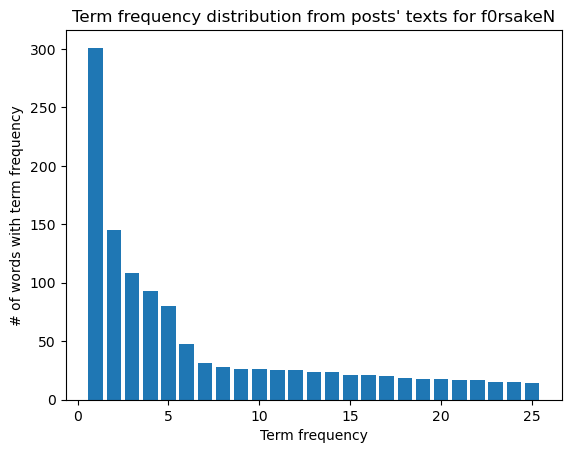

In [171]:
# construct the x and y values
y = [count for tag, count in term_freq_count_threadTitle_list[0].most_common(num_freq_term)]
x = range(1, len(y) + 1)

# use matplotlib bar chat to plot this
plt.bar(x, y)
plt.title("Term frequency distribution from posts' texts for f0rsakeN")
plt.ylabel('# of words with term frequency')
plt.xlabel('Term frequency')
plt.show()

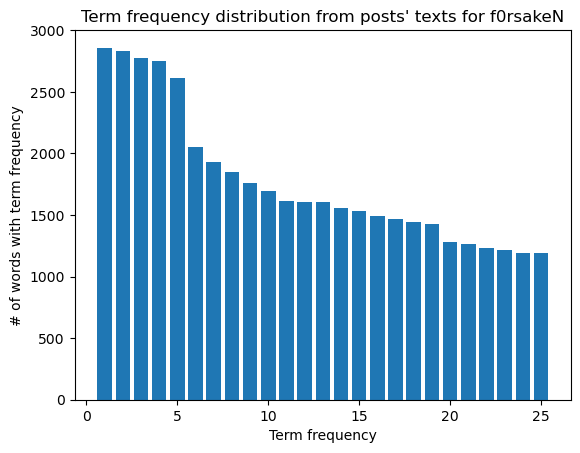

In [212]:
# construct the x and y values
y = [count for tag, count in term_freq_count_comms_list[0].most_common(num_freq_term)]
x = range(1, len(y) + 1)

# use matplotlib bar chat to plot this
plt.bar(x, y)
plt.title("Term frequency distribution from posts' texts for f0rsakeN")
plt.ylabel('# of words with term frequency')
plt.xlabel('Term frequency')
plt.show()

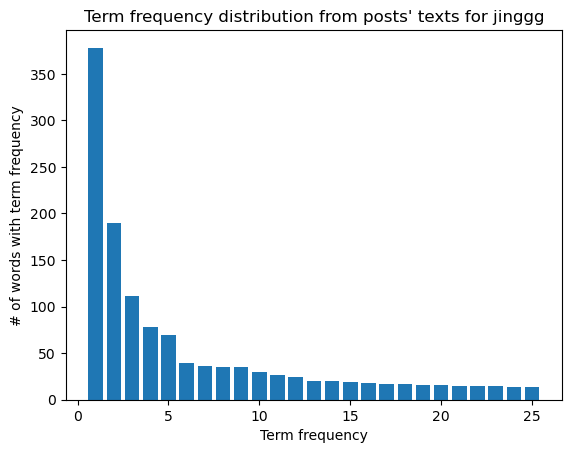

In [217]:
# construct the x and y values
y = [count for tag, count in term_freq_count_threadTitle_list[1].most_common(num_freq_term)]
x = range(1, len(y) + 1)

# use matplotlib bar chat to plot this
plt.bar(x, y)
plt.title("Term frequency distribution from posts' texts for jinggg")
plt.ylabel('# of words with term frequency')
plt.xlabel('Term frequency')
plt.show()

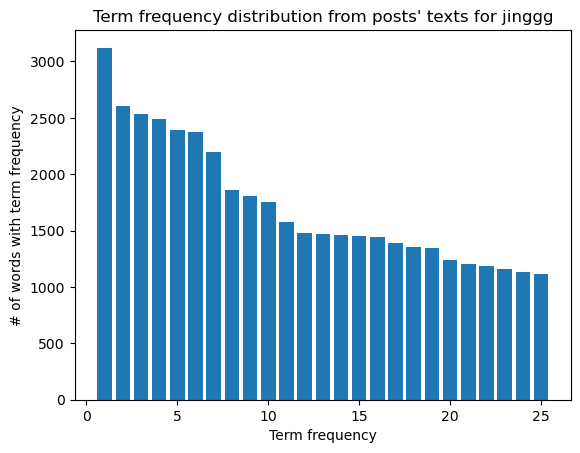

In [218]:
# construct the x and y values
y = [count for tag, count in term_freq_count_comms_list[1].most_common(num_freq_term)]
x = range(1, len(y) + 1)

# use matplotlib bar chat to plot this
plt.bar(x, y)
plt.title("Term frequency distribution from posts' texts for jinggg")
plt.ylabel('# of words with term frequency')
plt.xlabel('Term frequency')
plt.show()

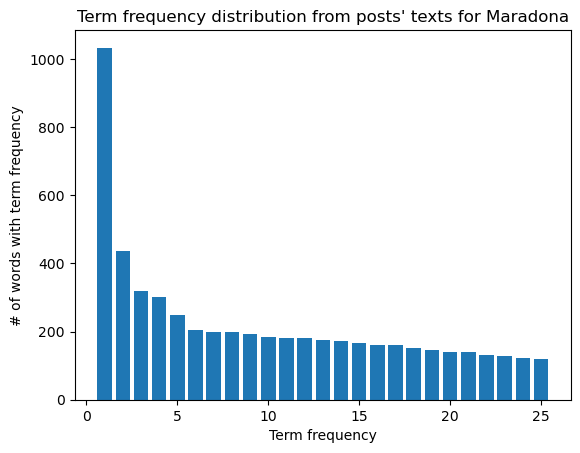

<Figure size 640x480 with 0 Axes>

In [60]:
# construct the x and y values
y = [count for tag, count in term_freq_count_text_list[3].most_common(num_freq_term)]
x = range(1, len(y) + 1)

# use matplotlib bar chat to plot this
plt.bar(x, y)
plt.title("Term frequency distribution from posts' texts for Maradona")
plt.ylabel('# of words with term frequency')
plt.xlabel('Term frequency')
plt.show()
plt.savefig('termFreq_Maradona_graph.png')

Sentiment Analysis for 'Ronaldo' and 'Messi' in Australia

In [220]:
posWordFile = 'positive-words.txt' # input file of set of postive words
negWordFile = 'negative-words.txt' # input file of set of negative words

flagPrint = False # flag to determine whether to print out tweets and their sentiment

regexpr = r'\w+' # Regular Expression for tokenizer

In [221]:
def vaderPrintTokens(lTokens, dSentimentScores):
    """
    Print out the tokens and sentiment score.
    
    @param lTokens: List of tokens to print and colour.
    @dSentimentScores: Dictionary of sentiment from Vader.

    """
    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [222]:
def vaderSentimentAnalysis(data, bPrint, tweetProcessor):
    """
    Use Vader lexicons instead of a raw positive and negative word count.

    @param bPrint: whether to print the stream of tokens and sentiment.  Uses colorama to highlight sentiment words.
    @param tweetProcessor: TweetProcessing object, used to pre-process each tweet.

    @returns: list of tweets, in the format of [date, sentiment]
    """

    # this is the vader sentiment analyser, part of nltk
    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    
    for i in range(len(data)):
        post_text = data['text'][i]
        post_date = data['datetime'][i]

        # pre-process the post text
        lTokens = redditProcessor.process(post_text)

        # this computes the sentiment scores (called polarity score in nltk, but mean same thing essentially)
        # see workshop sheet for what dSentimentScores holds
        dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

        # save the date and sentiment of each post (used for time series)
        lSentiment.append([pd.to_datetime(post_date, unit='s'), dSentimentScores['compound']])

        # if we are printing, we print the tokens then the sentiment scores.  Because we don't have the list
        # of positive and negative words, we cannot use colorama to label each token
        if bPrint:
            vaderPrintTokens(lTokens, dSentimentScores)
                    
                    
    return lSentiment

In [223]:
def vaderSentiAnalysFunc(data, colName, bPrint, tweetProcessor):
    """
    Use Vader lexicons instead of a raw positive and negative word count.

    @param bPrint: whether to print the stream of tokens and sentiment.  Uses colorama to highlight sentiment words.
    @param tweetProcessor: TweetProcessing object, used to pre-process each tweet.

    @returns: list of tweets, in the format of [date, sentiment]
    """

    # this is the vader sentiment analyser, part of nltk
    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    
    for i in range(len(data)):
        post_text = data[colName][i]
        post_date = data['datetime'][i]

        # pre-process the post text
        lTokens = redditProcessor.process(post_text)

        # this computes the sentiment scores (called polarity score in nltk, but mean same thing essentially)
        # see workshop sheet for what dSentimentScores holds
        dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

        # save the date and sentiment of each post (used for time series)
        lSentiment.append([pd.to_datetime(post_date, unit='s'), dSentimentScores['compound']])

        # if we are printing, we print the tokens then the sentiment scores.  Because we don't have the list
        # of positive and negative words, we cannot use colorama to label each token
        if bPrint:
            vaderPrintTokens(lTokens, dSentimentScores)
                    
                    
    return lSentiment

In [85]:
# construct the reddit pro-processing object
# use regex tokenizer
reg_tokenizer = RegexpTokenizer(regexpr)
lPunct = list(string.punctuation)
# standard 'English' stopwords
lStopwords = stopwords.words('english') + lPunct

# call the RedditProcessing python script
redditProcessor = RedditProcessing.RedditProcessing(reg_tokenizer, lStopwords)


# load set of positive words
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    for sLine in fPos:
        lPosWords.append(sLine.strip())

setPosWords = set(lPosWords)


# load set of negative words
lNegWords = []
with codecs.open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    for sLine in fNeg:
        lNegWords.append(sLine.strip())

setNegWords = set(lNegWords)

In [86]:
text_l_senti_list = []
for i in range(len(playerNames)):
    text_l_senti_list.append(list())
    text_l_senti_list[i] = vaderSentimentAnalysis(dataList_clean[i], flagPrint, redditProcessor)

In [88]:
text_l_senti_list_new = []
for i in range(len(playerNames)):
    text_l_senti_list_new.append(list())
    text_l_senti_list_new[i] = vaderSentiAnalysFunc(dataList_clean[i], 'text', flagPrint, redditProcessor)

topic_l_senti_list_new = []
for i in range(len(playerNames)):
    topic_l_senti_list_new.append(list())
    topic_l_senti_list_new[i] = vaderSentiAnalysFunc(dataList_clean[i], 'topic', flagPrint, redditProcessor)

In [115]:
text_l_senti_ronaldo = vaderSentiAnalysFunc(dataList_clean_ronaldo, 'text', flagPrint, redditProcessor)
topic_l_senti_ronaldo = vaderSentiAnalysFunc(dataList_clean_ronaldo, 'topic', flagPrint, redditProcessor)

In [89]:
def sentiTS(text_senti):
    # we are using pandas for this, but first we need to get it into a pandas data frame structure
    text_senti_series = pd.DataFrame(text_senti, columns=['date', 'sentiment'])
    # tell pandas that the date column is the one we use for indexing (or x-axis)
    text_senti_series.set_index('date', inplace=True)
    # pandas makes a guess at the type of the columns, but to make sure it doesn't get it wrong, we set the sentiment
    # column to floats
    text_senti_series[['sentiment']] = text_senti_series[['sentiment']].apply(pd.to_numeric)
    return text_senti_series

In [117]:
text_senti_series_list = []
for i in range(len(playerNames)):
    text_senti_series_list.append(sentiTS(text_l_senti_list[i]))

In [118]:
topic_senti_series_list = []
for i in range(len(playerNames)):
    topic_senti_series_list.append(sentiTS(topic_l_senti_list_new[i]))

In [119]:
text_senti_series_ronaldo = sentiTS(text_l_senti_ronaldo)
topic_senti_series_ronaldo = sentiTS(topic_l_senti_ronaldo)

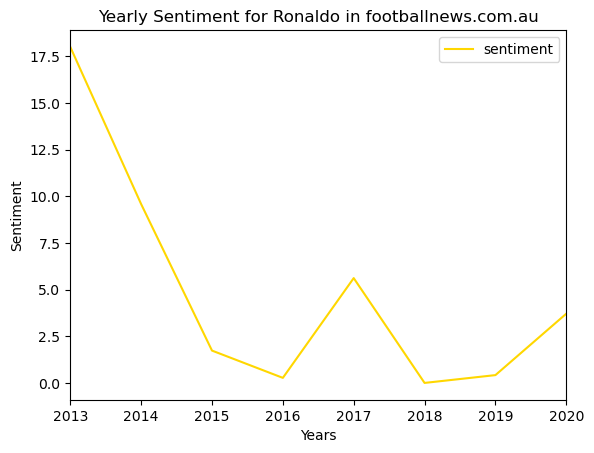

In [122]:
new_topic_senti_series_ronaldo = text_senti_series_ronaldo.resample('1Y').sum()
new_topic_senti_series_ronaldo.plot(label='Ronaldo', color='gold')
plt.title("Yearly Sentiment for Ronaldo in footballnews.com.au")
    
plt.xlabel('Years') 
plt.ylabel('Sentiment')
plt.savefig('yearlySentiment_ronaldo2013.png')

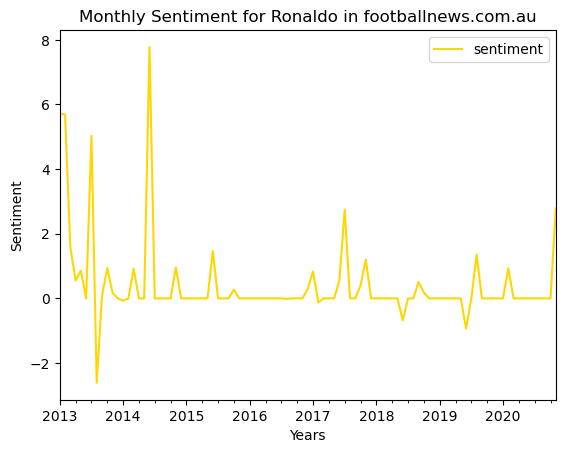

In [124]:
new_topic_senti_series_ronaldo = text_senti_series_ronaldo.resample('1M').sum()
new_topic_senti_series_ronaldo.plot(label='Ronaldo', color='gold')
plt.title("Monthly Sentiment for Ronaldo in footballnews.com.au")
    
plt.xlabel('Years') 
plt.ylabel('Sentiment')
plt.savefig('monthlySentiment_ronaldo2013.png')

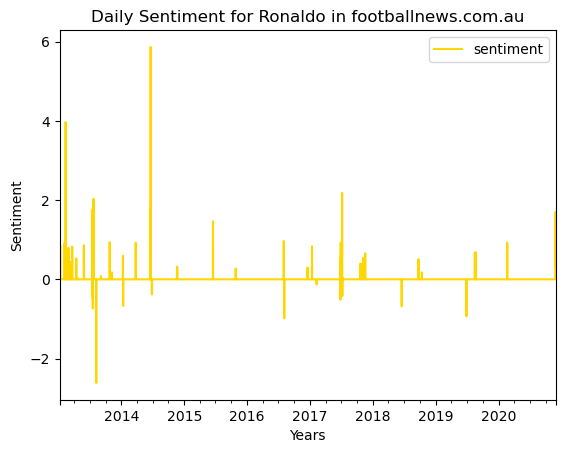

In [125]:
new_topic_senti_series_ronaldo = text_senti_series_ronaldo.resample('1D').sum()
new_topic_senti_series_ronaldo.plot(label='Ronaldo', color='gold')
plt.title("Daily Sentiment for Ronaldo in footballnews.com.au")
    
plt.xlabel('Years') 
plt.ylabel('Sentiment')
plt.savefig('dailySentiment_ronaldo2013.png')

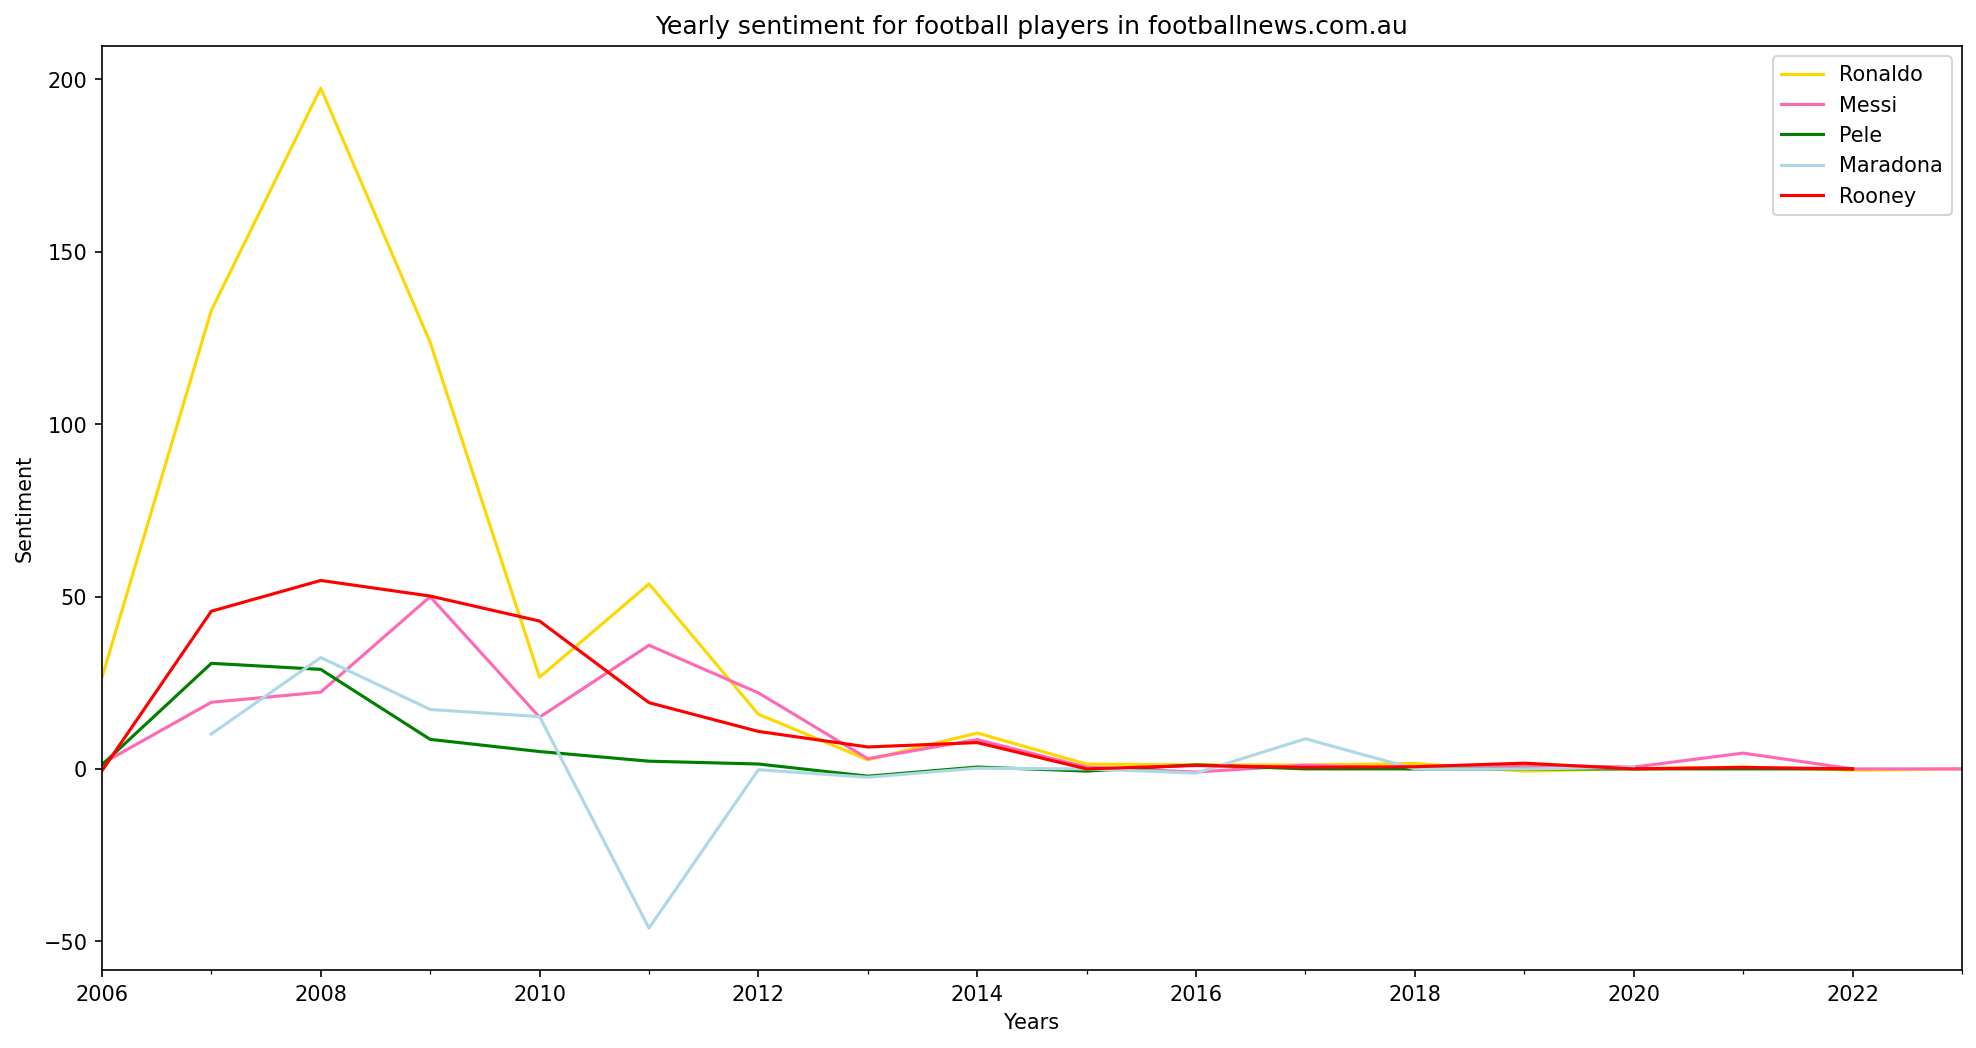

In [99]:
comparePlotTS(playerNames, topic_senti_series_list, '1Y', 'sentiment')
plt.savefig('yearlySentiment_topic_graph.png')

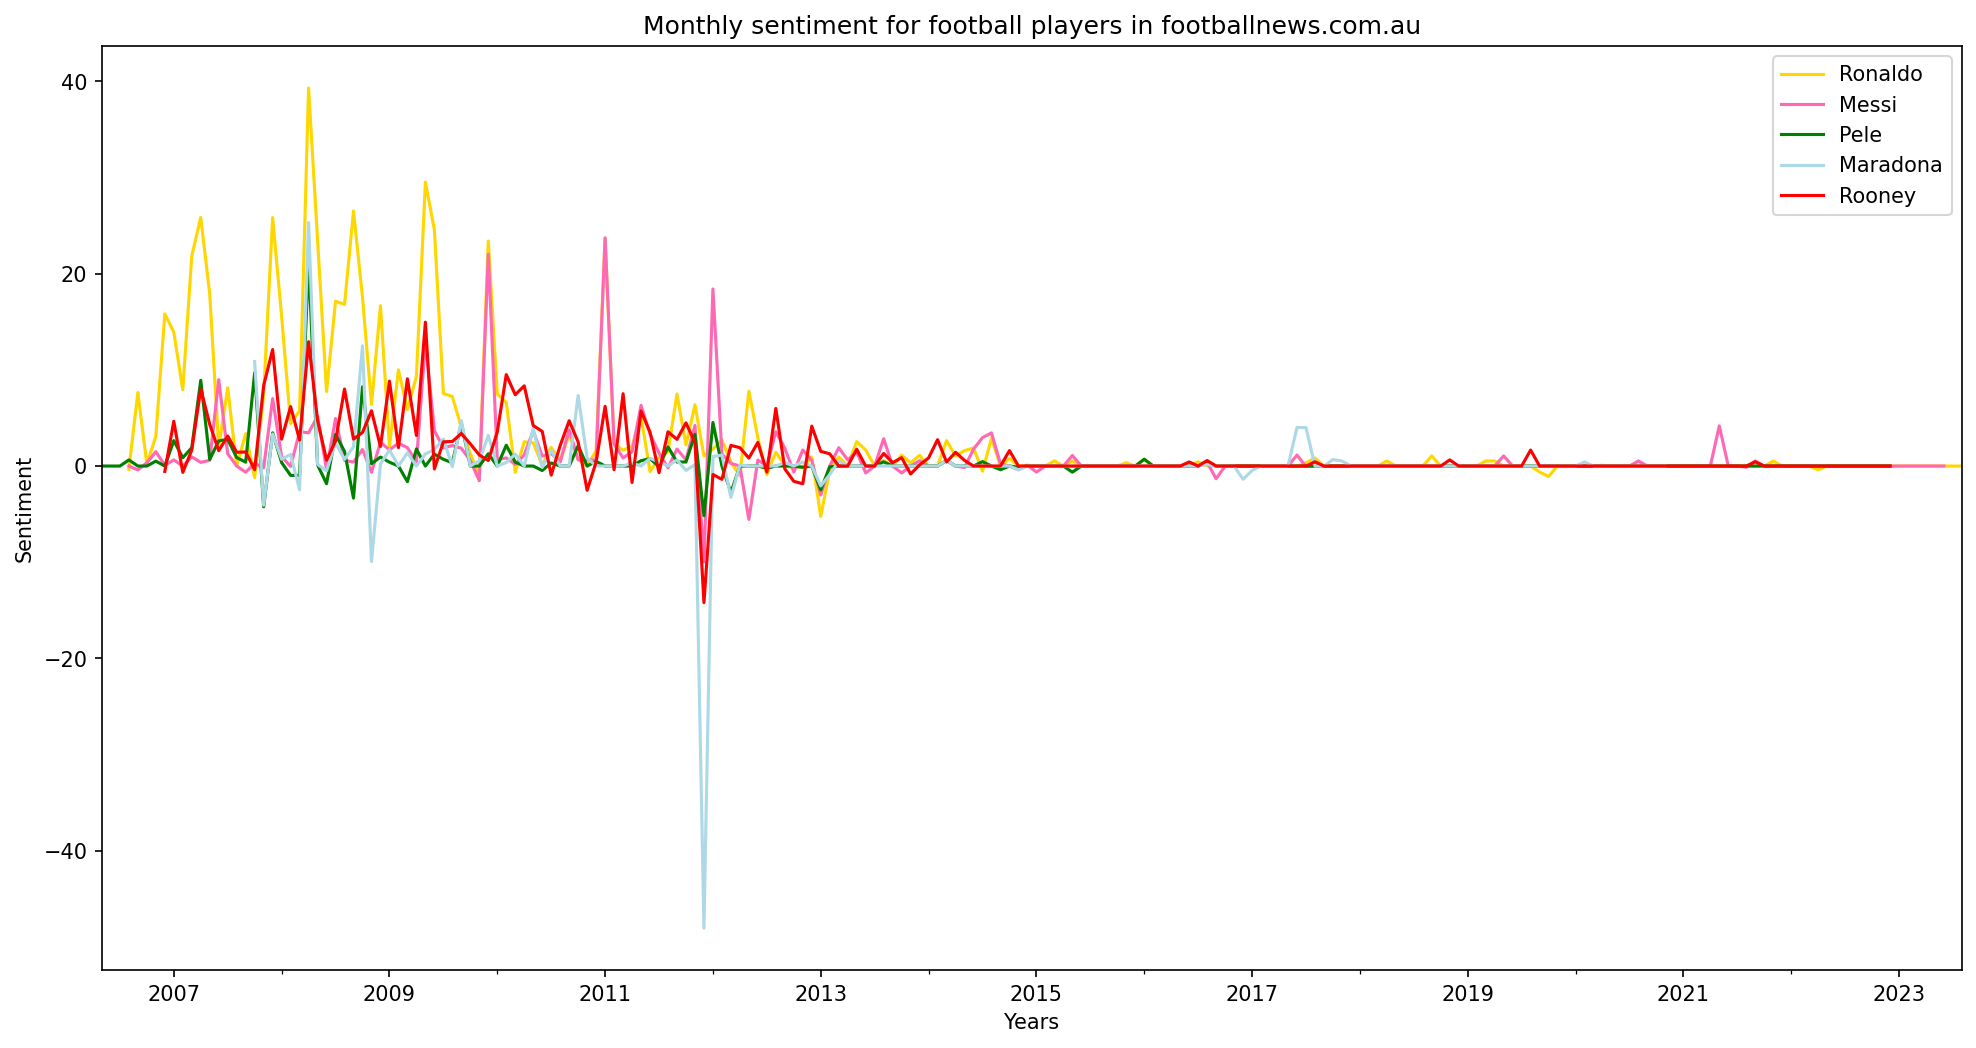

In [100]:
comparePlotTS(playerNames, topic_senti_series_list, '1M', 'sentiment')
plt.savefig('monthlySentiment_topic_graph.png')

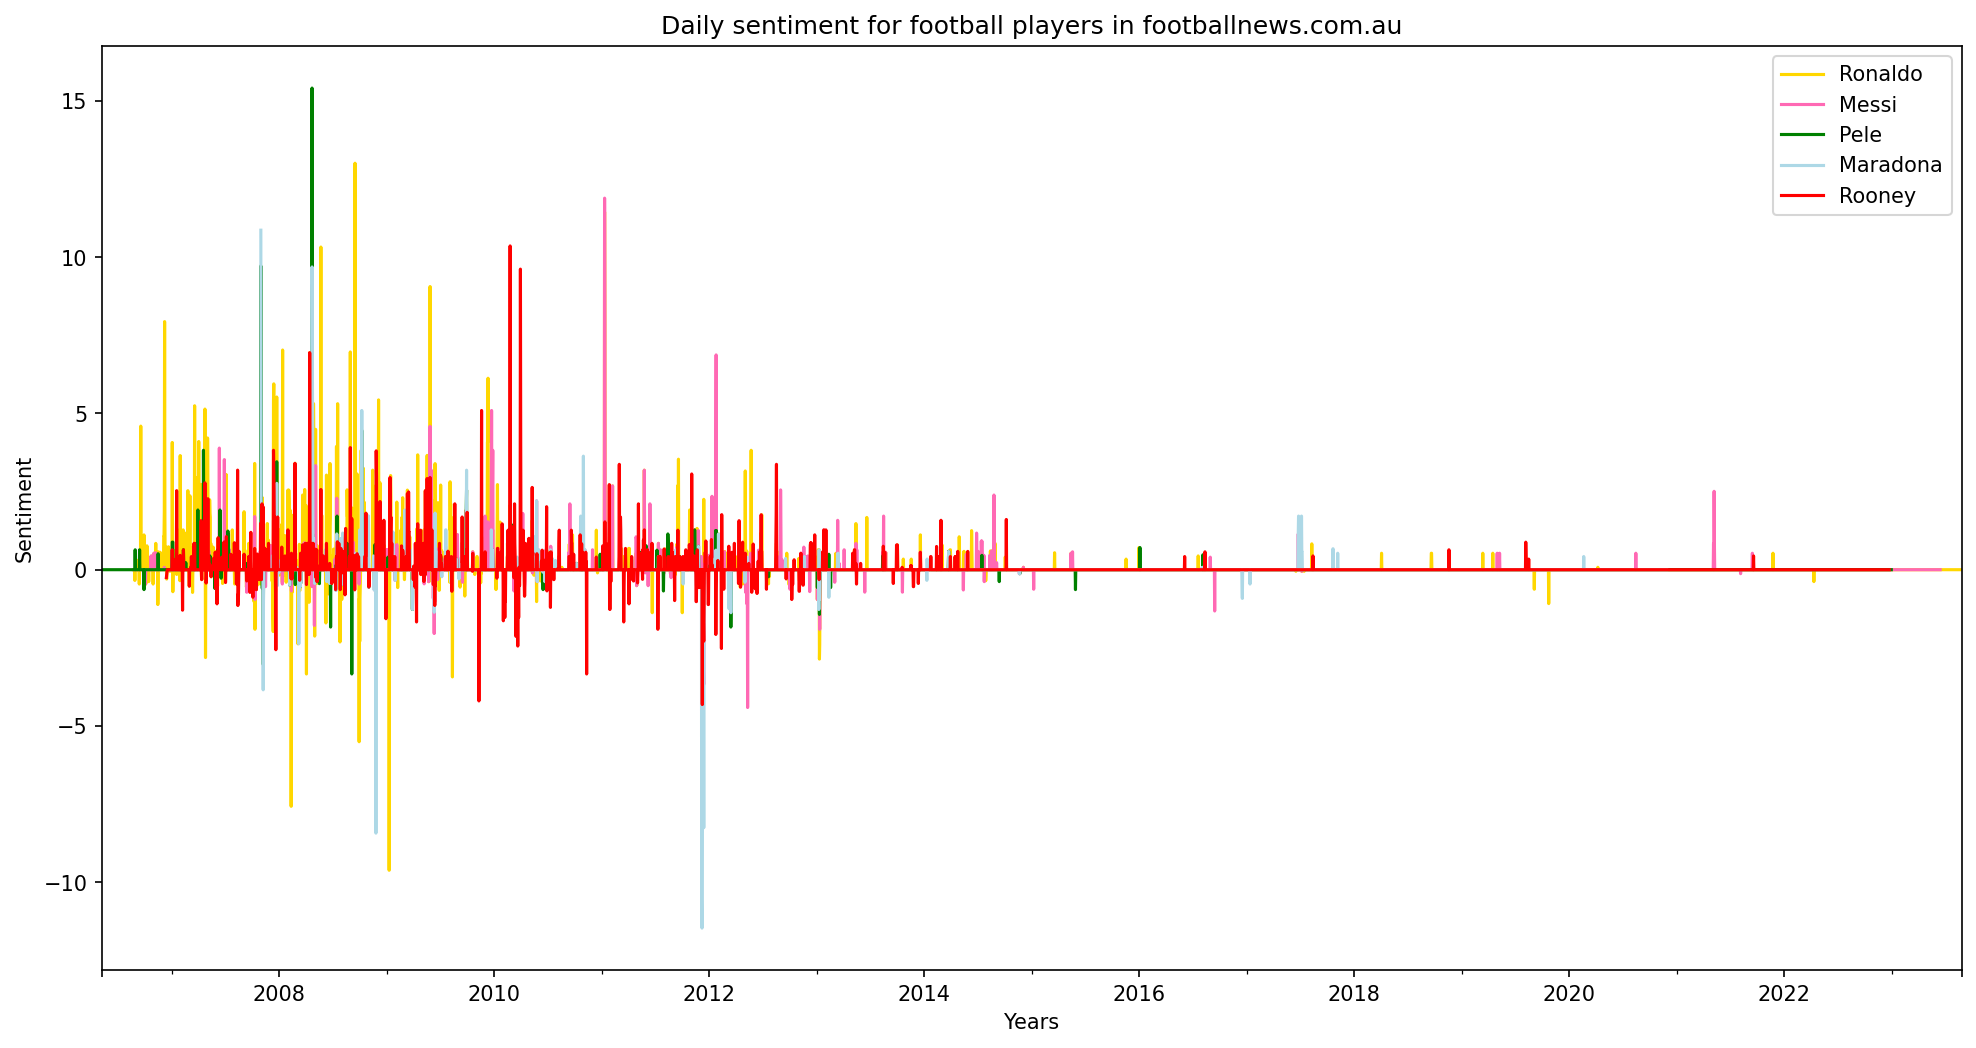

In [101]:
comparePlotTS(playerNames, topic_senti_series_list, '1D', 'sentiment')
plt.savefig('dailySentiment_topic_graph.png')

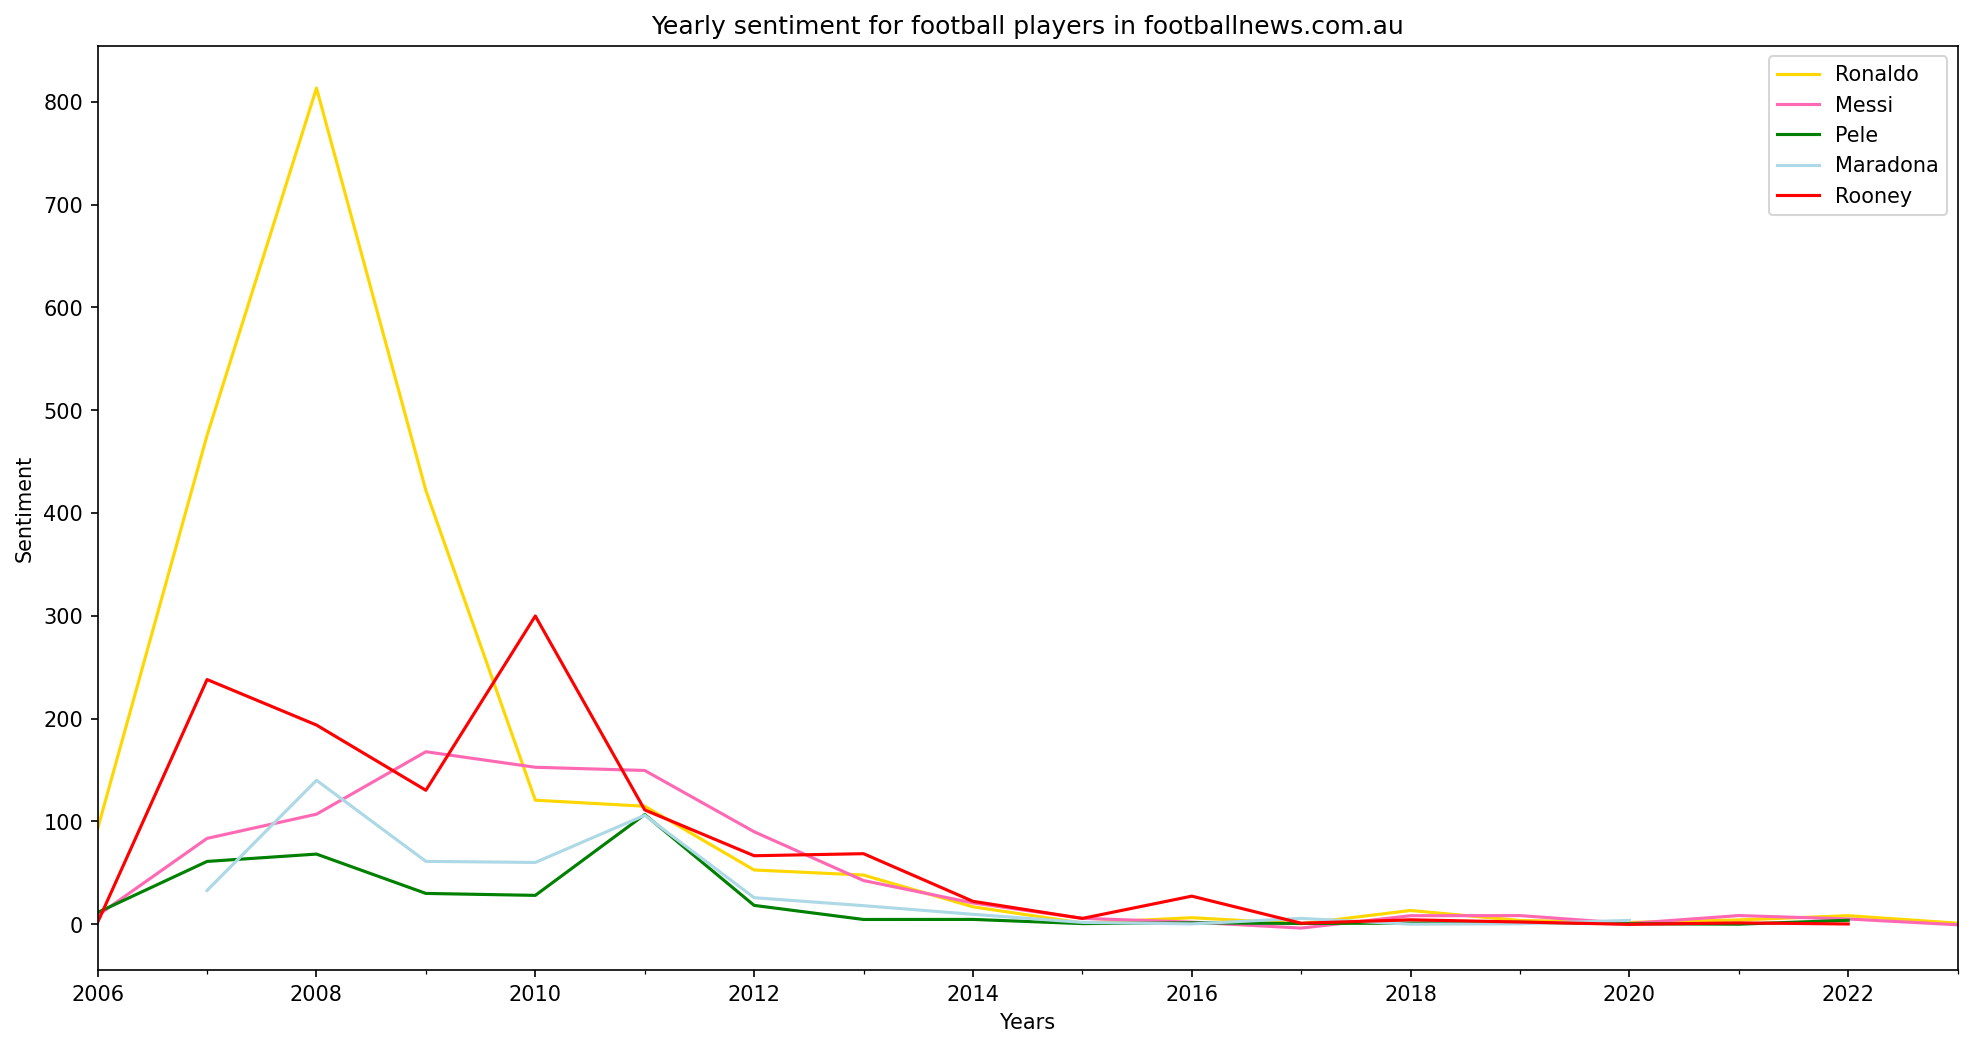

In [94]:
comparePlotTS(playerNames, text_senti_series_list, '1Y', 'sentiment')
plt.savefig('yearlySentiment_graph.png')

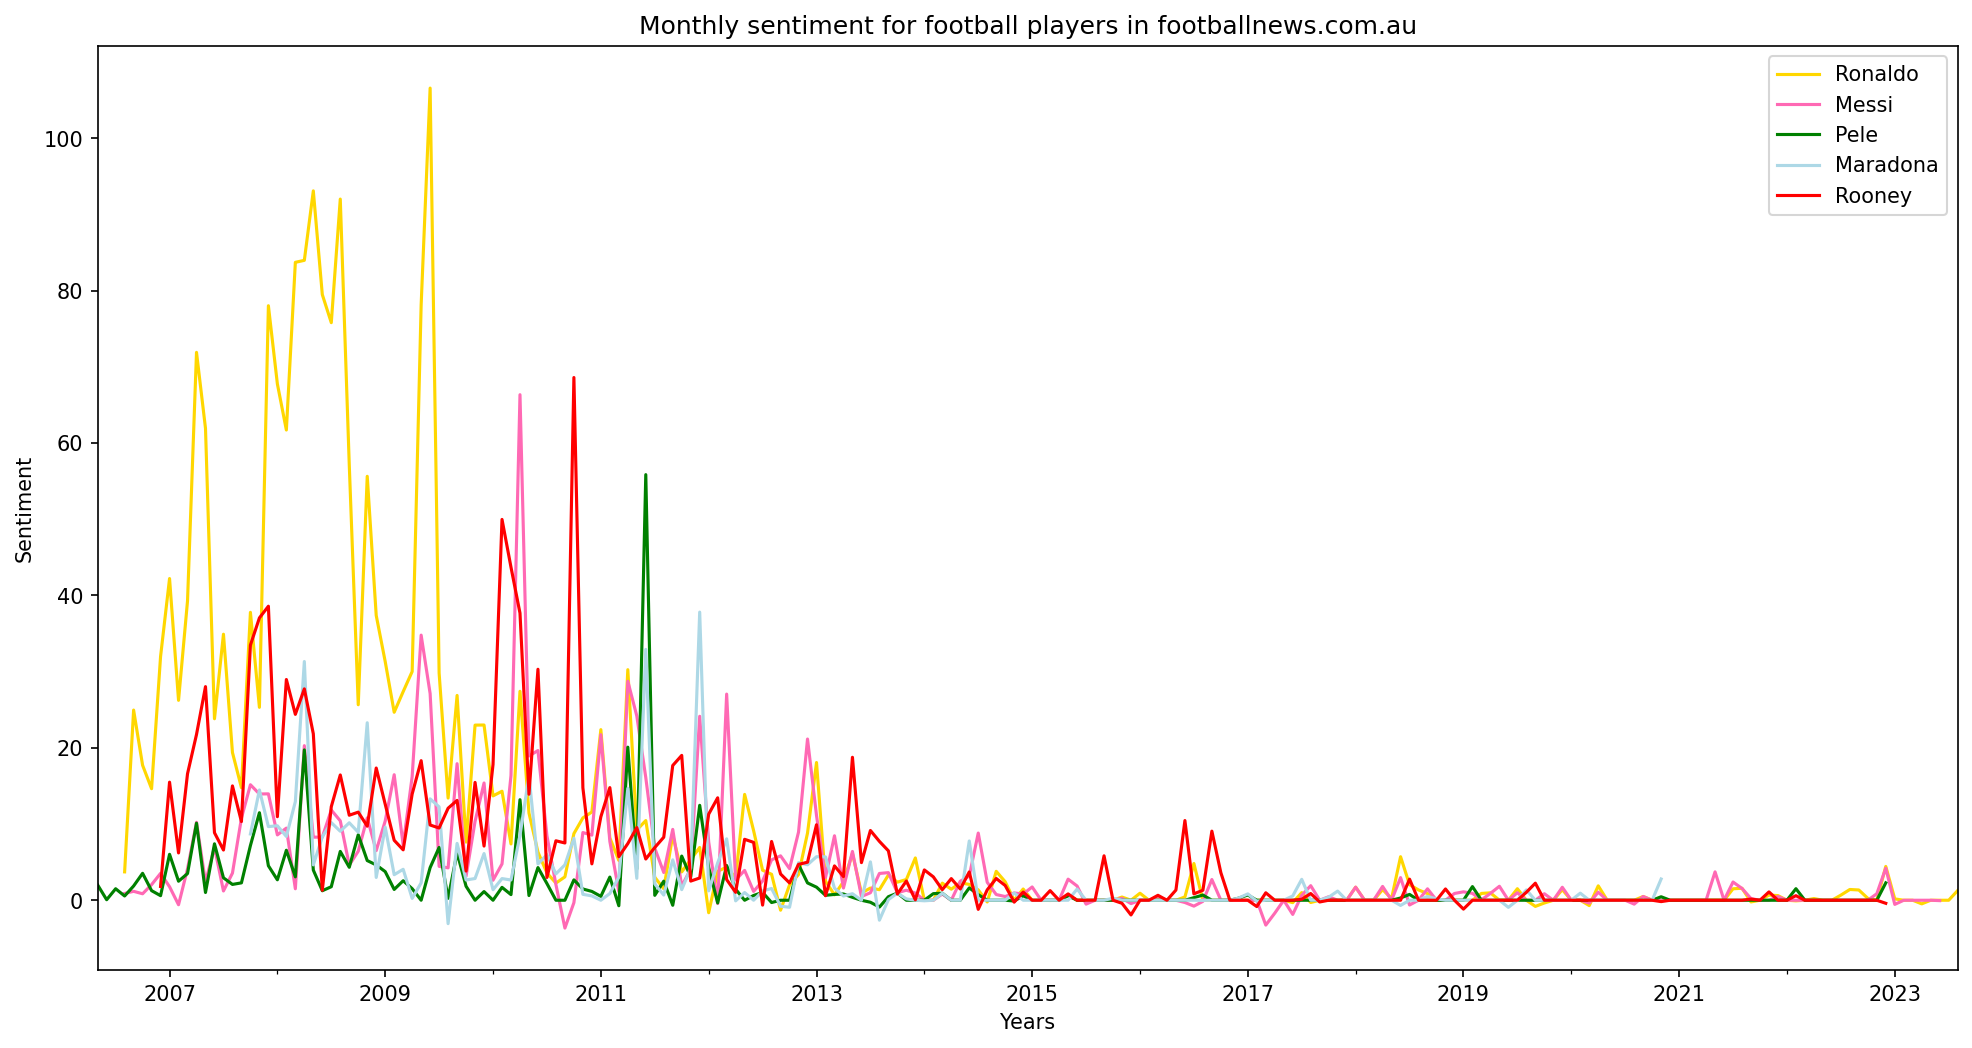

In [95]:
comparePlotTS(playerNames, text_senti_series_list, '1M', 'sentiment')
plt.savefig('monthlySentiment_graph.png')

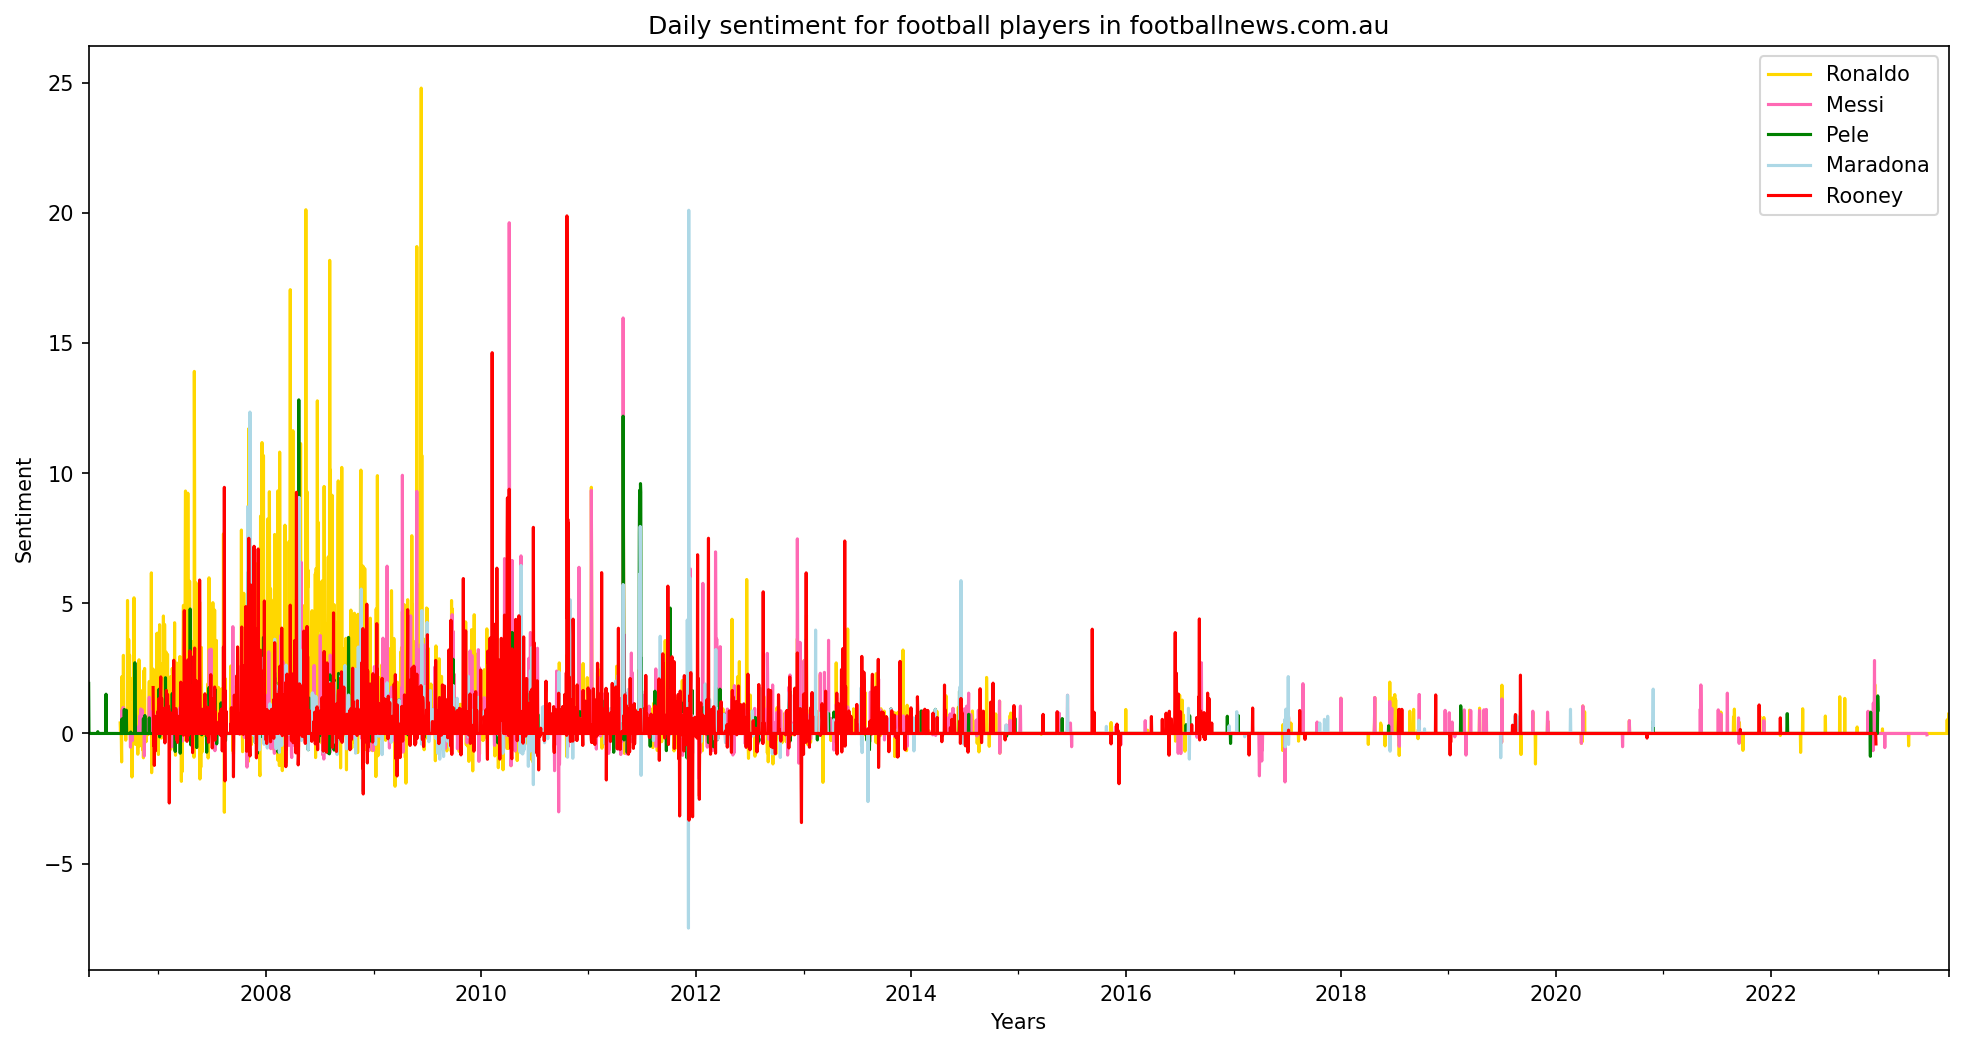

In [96]:
comparePlotTS(playerNames, text_senti_series_list, '1D', 'sentiment')
plt.savefig('dailySentiment_graph.png')